# Reinforcement Learning

## Definition

        RL lingo involves anthropomorphizing the algorithm into taking actions to receive rewards. The algorithm is often referred to as an agent that acts with the environment.

# Model 

In [30]:
from yahoo_finance import Share
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import tensorflow as tf 
import random 
import seaborn as sns
import urllib.request as urllib2
from bs4 import BeautifulSoup as bs
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [34]:
def get_prices(share_symbol, number_of_days, filename='stock_prices,npy'):
    try: 
        prices = np.load(filename)
    except: 
        data = []
        url = "https://finance.yahoo.com/quote/" + share_symbol + "/history/"
        rows = bs(urllib2.urlopen(url).read()).findAll('table')[0].tbody.findAll('tr')

        for each_row in rows:
            divs = each_row.findAll('td')
            if divs[1].span.text  != 'Dividend': #Ignore this row in the table
                #I'm only interested in 'Open' price; For other values, play with divs[1 - 5]
                data.append({'Date': divs[0].span.text, 'Open': float(divs[1].span.text.replace(',',''))})

        prices = np.asarray(data[:number_of_days])
        np.save(filename, prices)
    stock_prices = prices
    return prices
        
    

In [35]:
def plot_prices(prices):
    plt.title("Openining stock prices")
    plt.xlabel('day')
    plt.ylabel('price ($)')
    plt.plot(prices)
    plt.savefig('prices.png')
    plt.show()

/home/hf/anaconda2/envs/py36/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/hf/anaconda2/envs/py36/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


{'Date': 'Mar 16, 2018', 'Open': 1583.45}


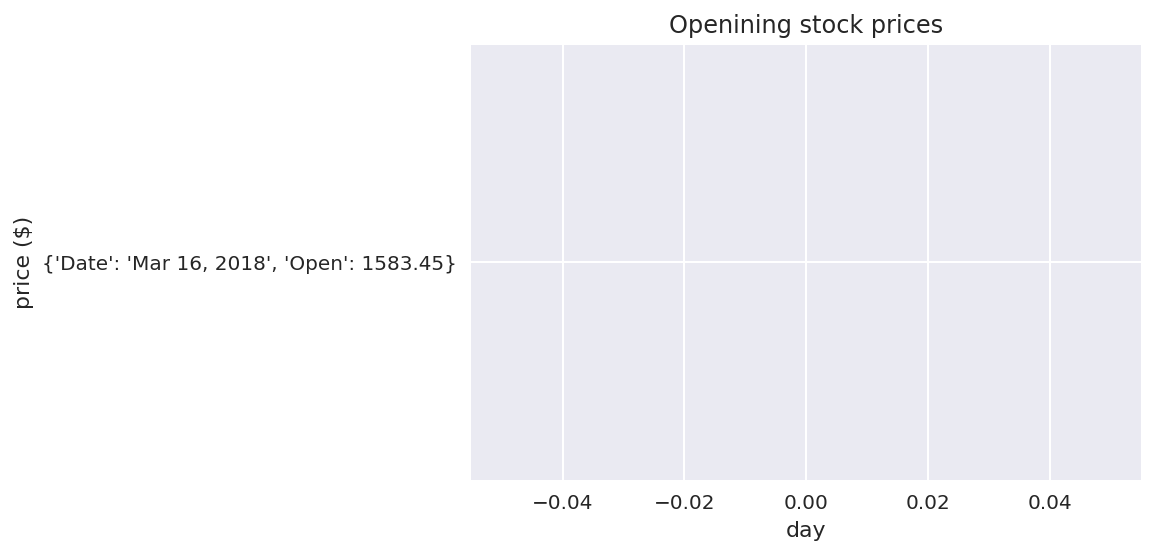

{'Date': 'Mar 15, 2018', 'Open': 1595.0}


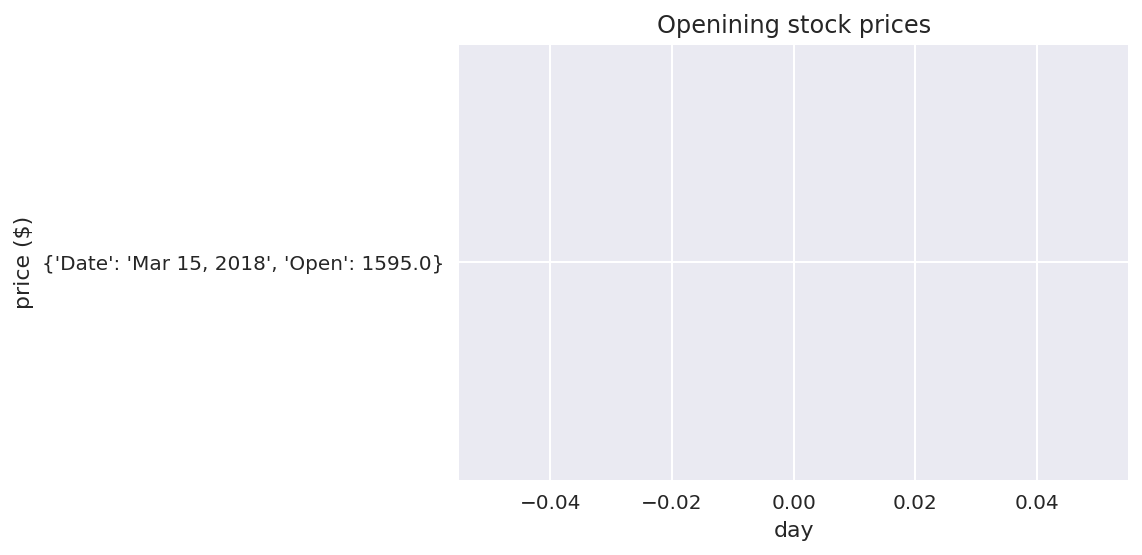

{'Date': 'Mar 14, 2018', 'Open': 1597.0}


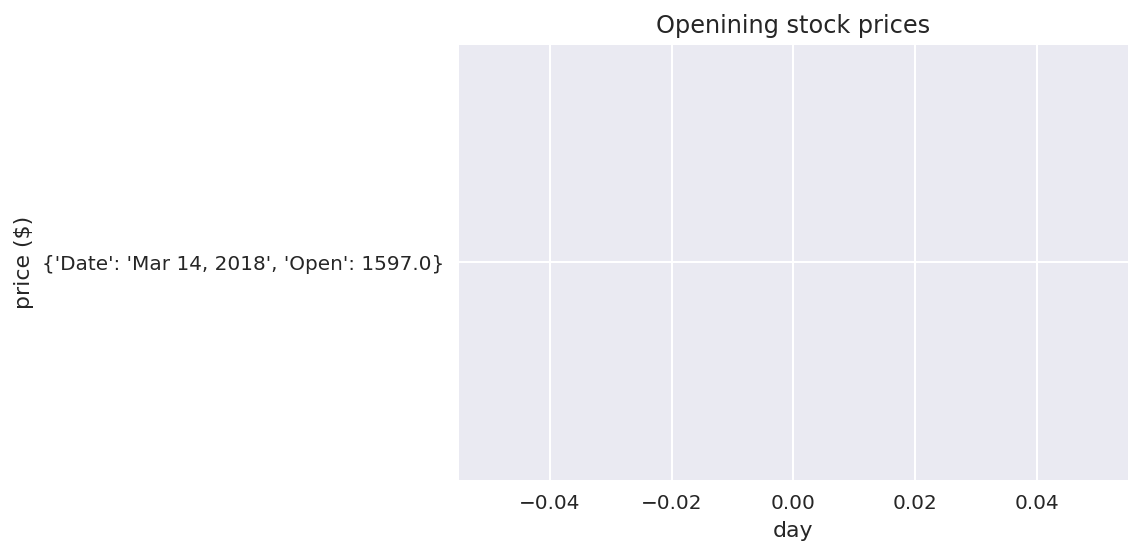

{'Date': 'Mar 13, 2018', 'Open': 1615.96}


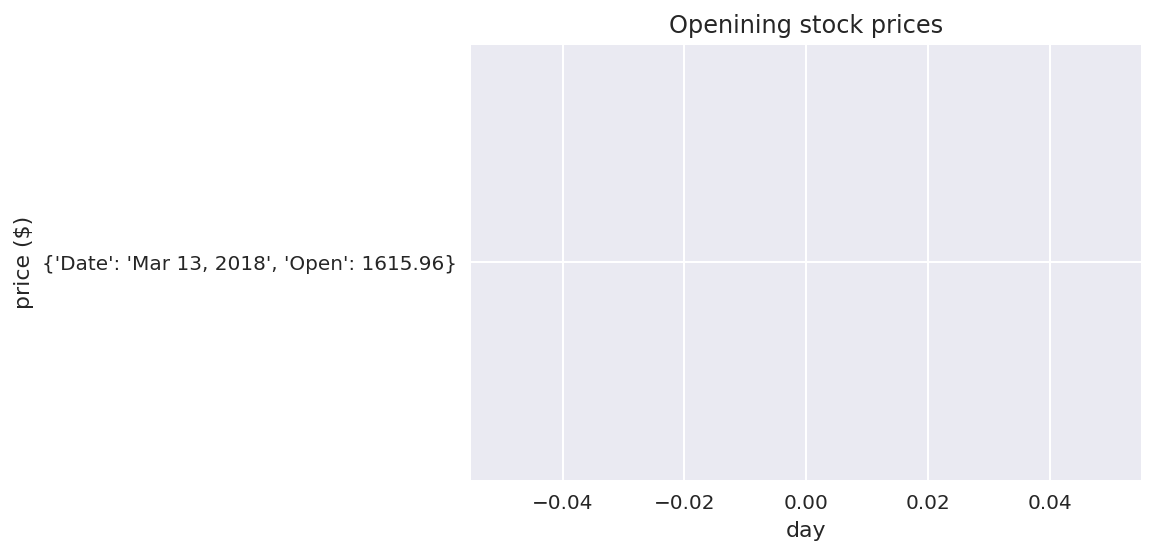

{'Date': 'Mar 12, 2018', 'Open': 1592.6}


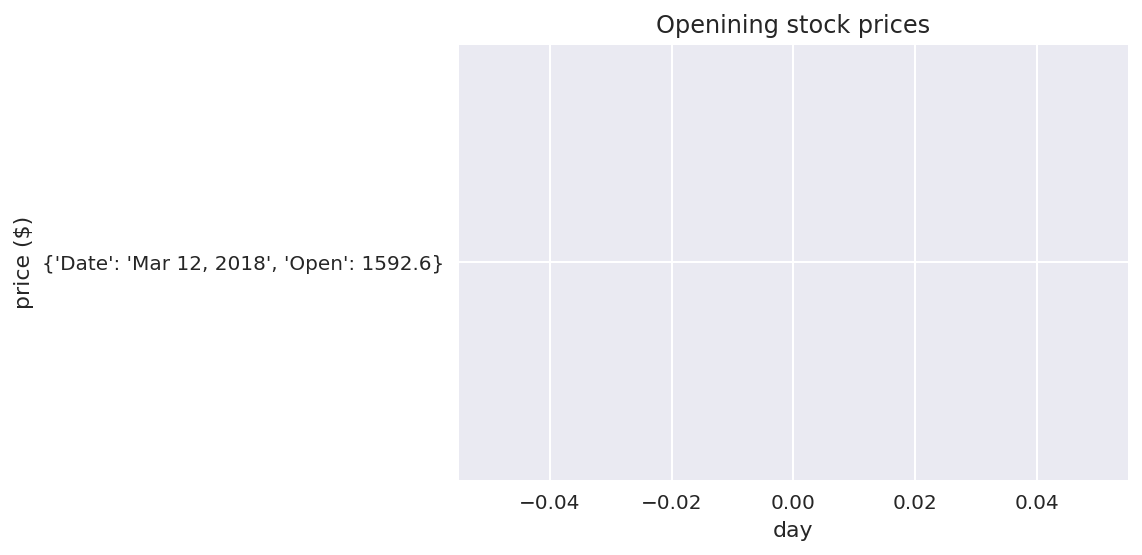

{'Date': 'Mar 09, 2018', 'Open': 1563.5}


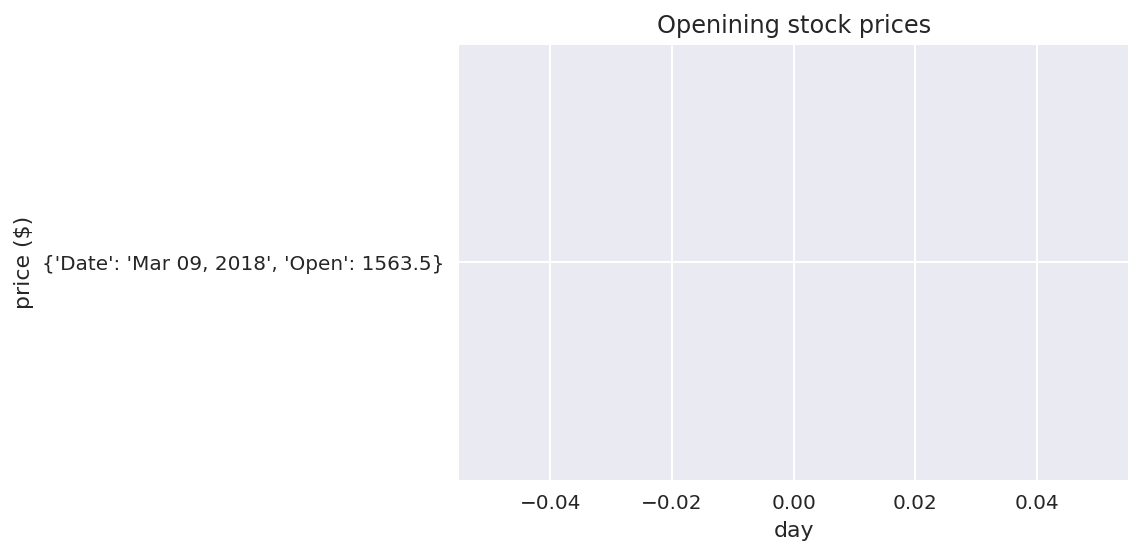

{'Date': 'Mar 08, 2018', 'Open': 1550.0}


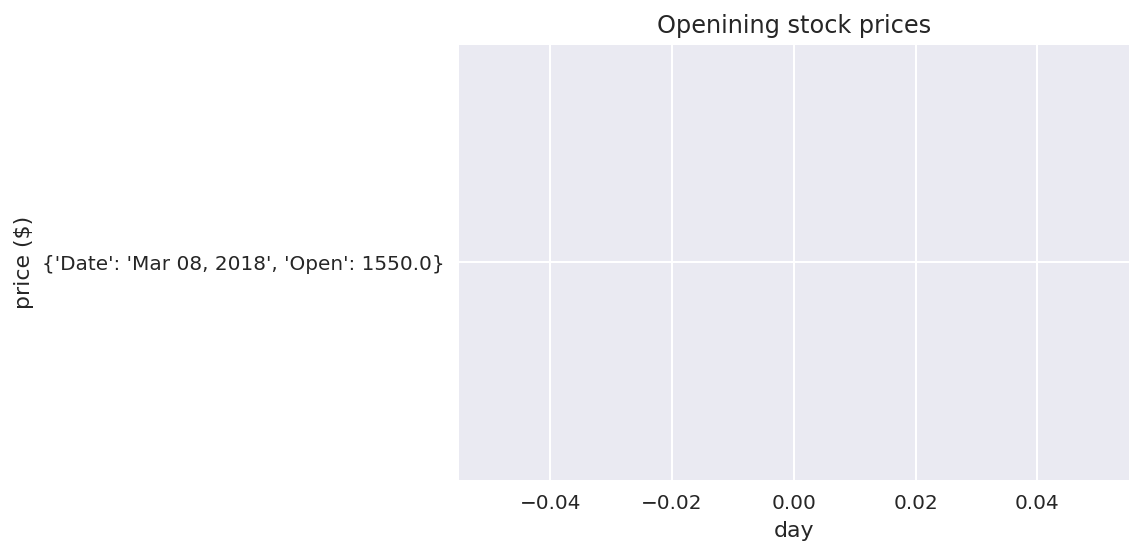

{'Date': 'Mar 07, 2018', 'Open': 1526.52}


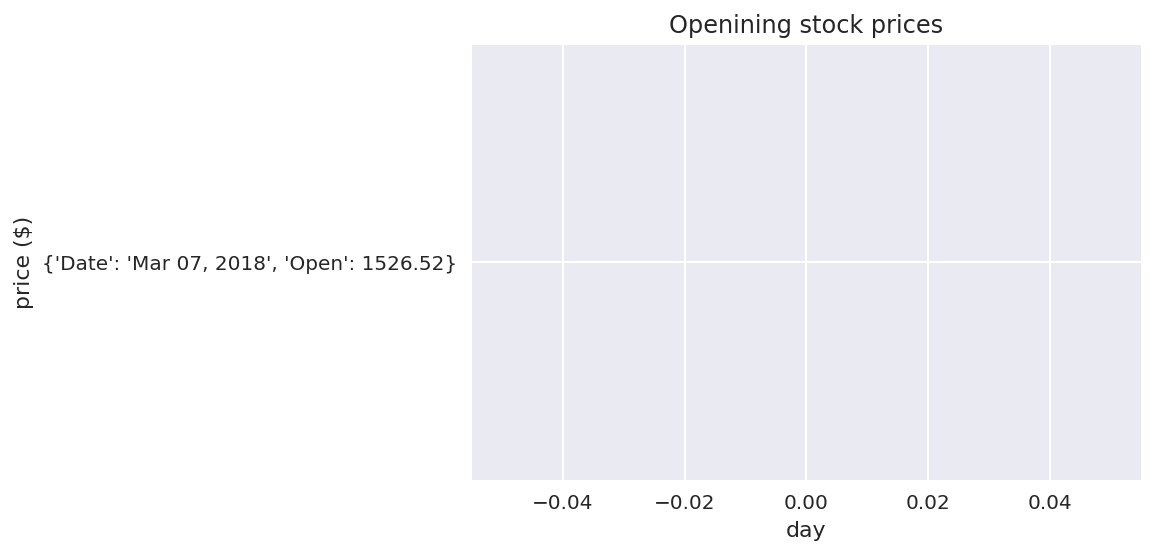

{'Date': 'Mar 06, 2018', 'Open': 1533.2}


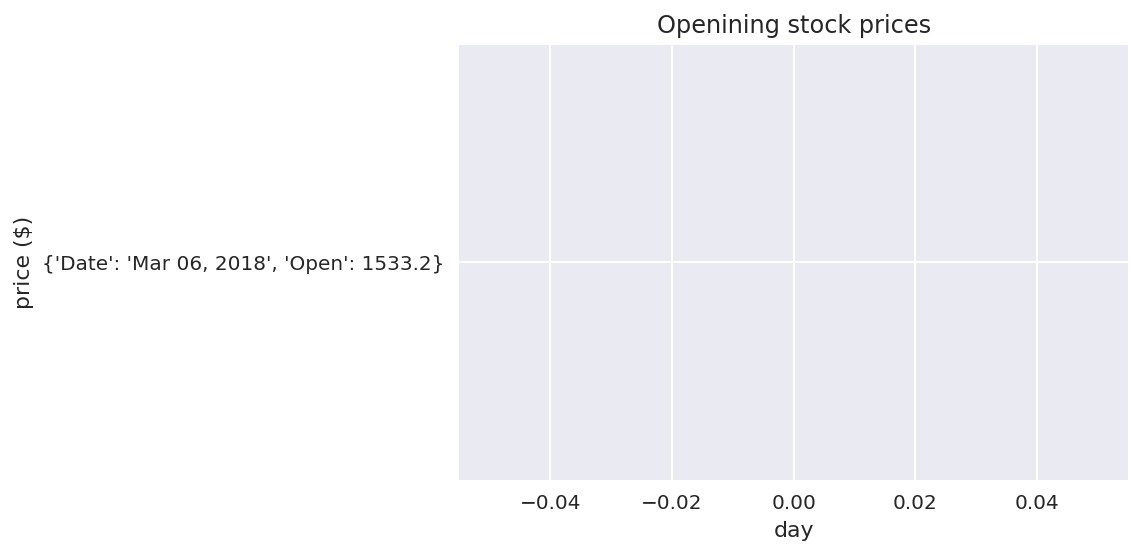

{'Date': 'Mar 05, 2018', 'Open': 1494.24}


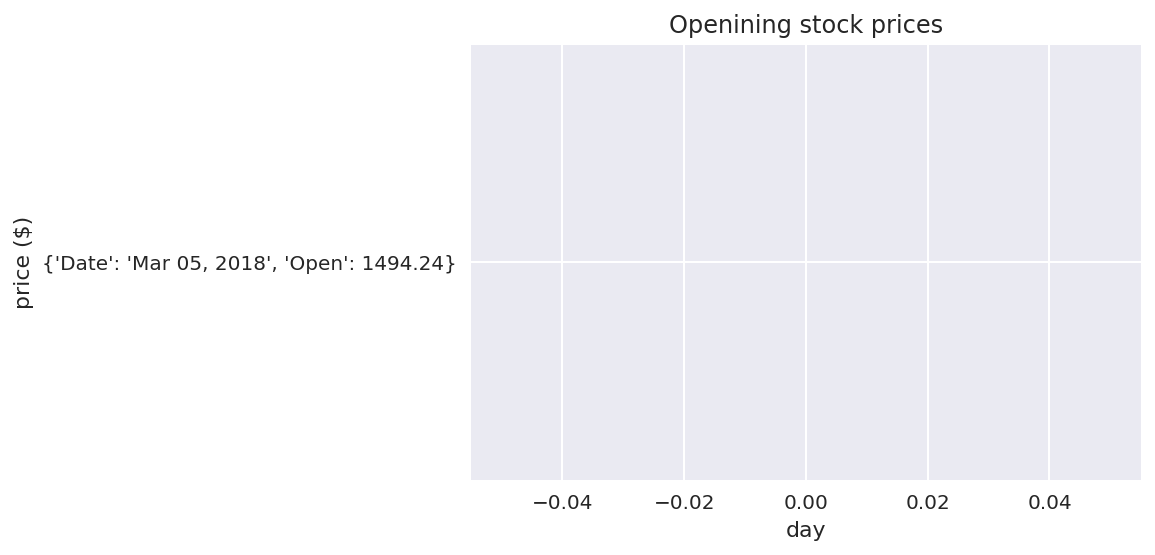

{'Date': 'Mar 02, 2018', 'Open': 1469.1}


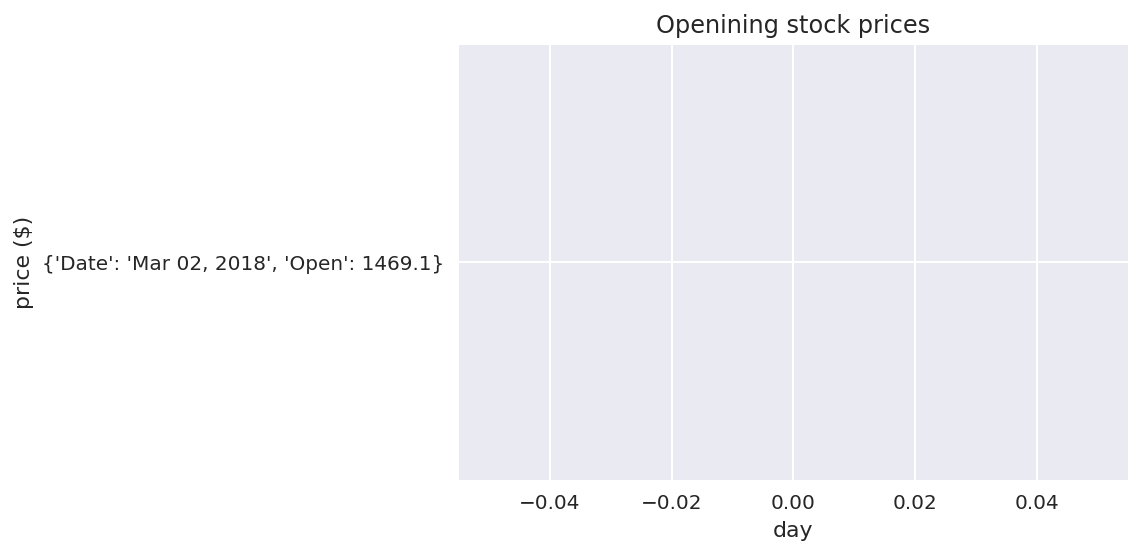

{'Date': 'Mar 01, 2018', 'Open': 1513.6}


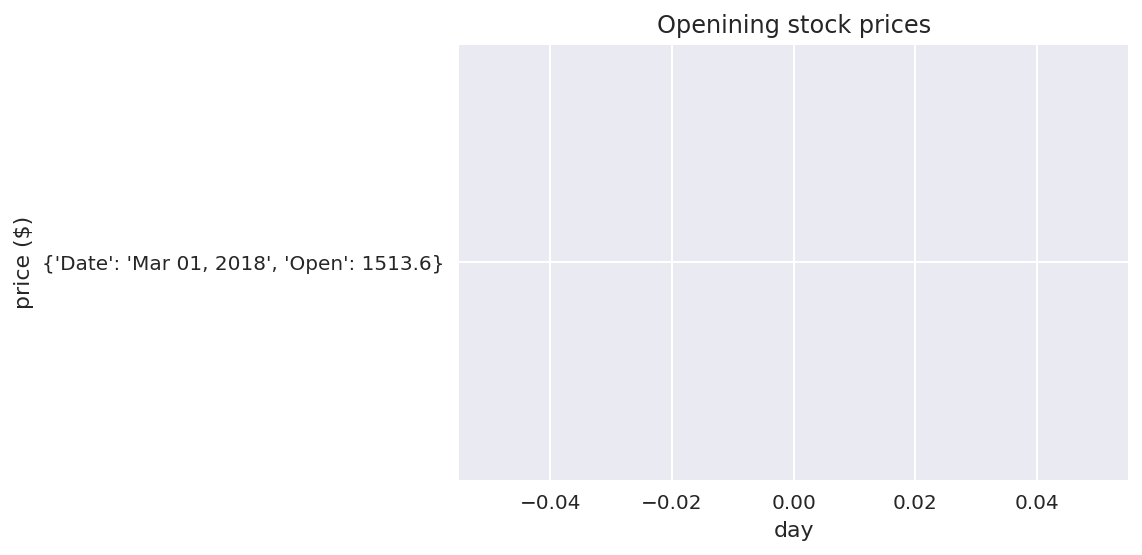

{'Date': 'Feb 28, 2018', 'Open': 1519.51}


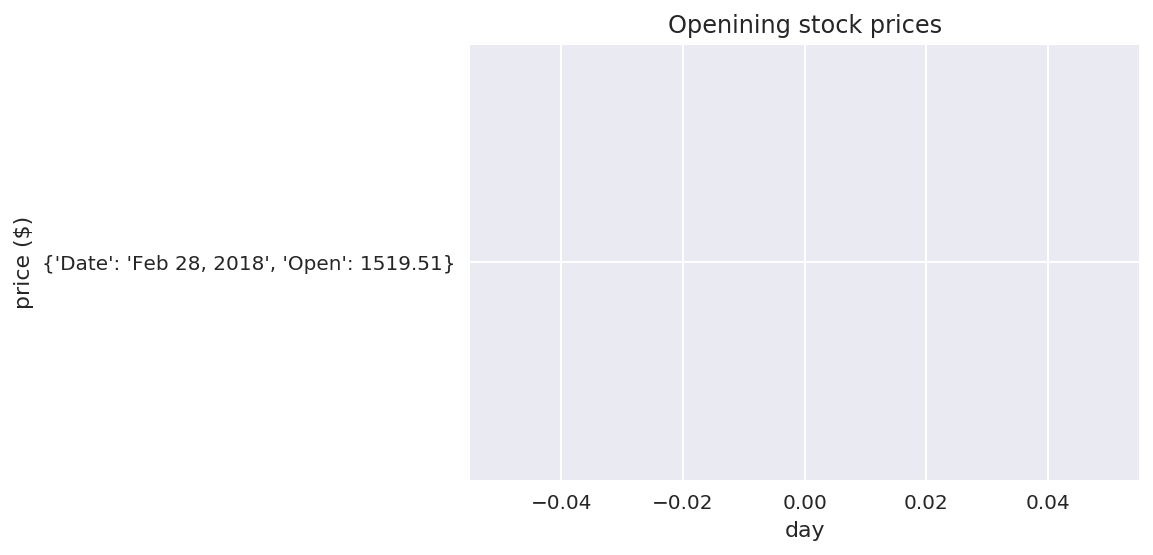

{'Date': 'Feb 27, 2018', 'Open': 1524.5}


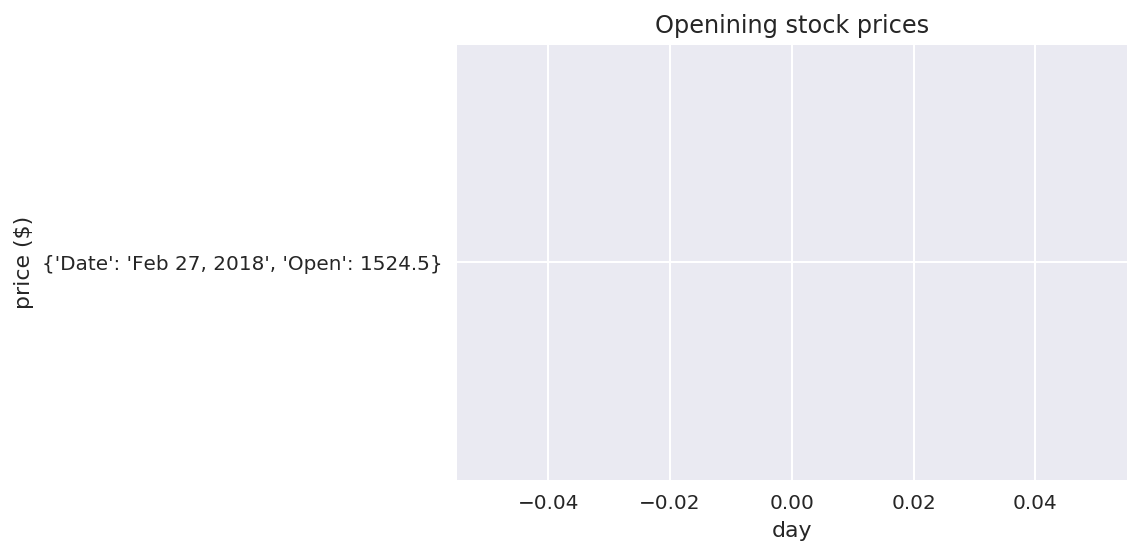

{'Date': 'Feb 26, 2018', 'Open': 1509.2}


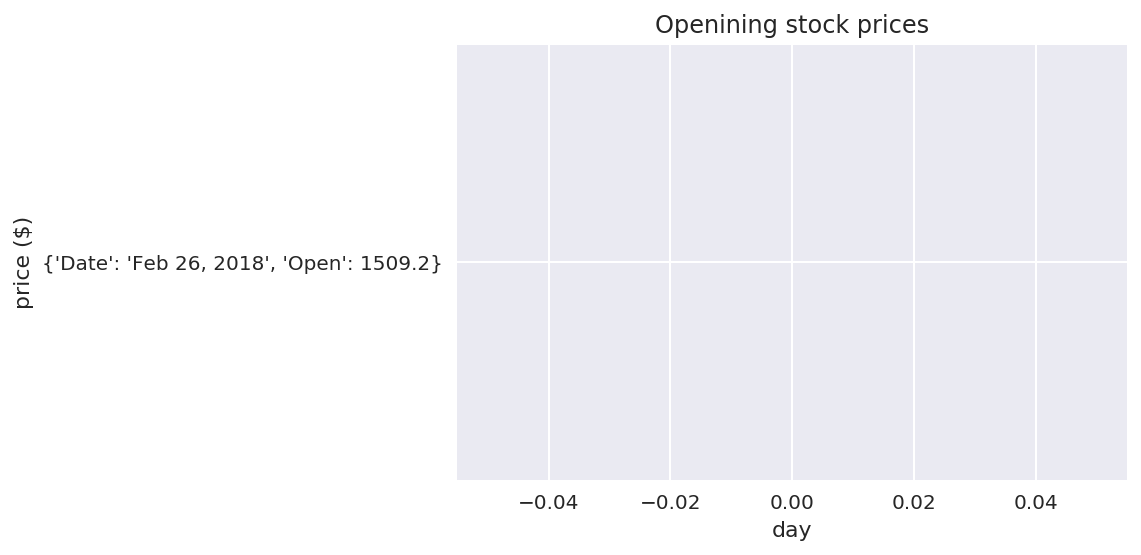

{'Date': 'Feb 23, 2018', 'Open': 1495.34}


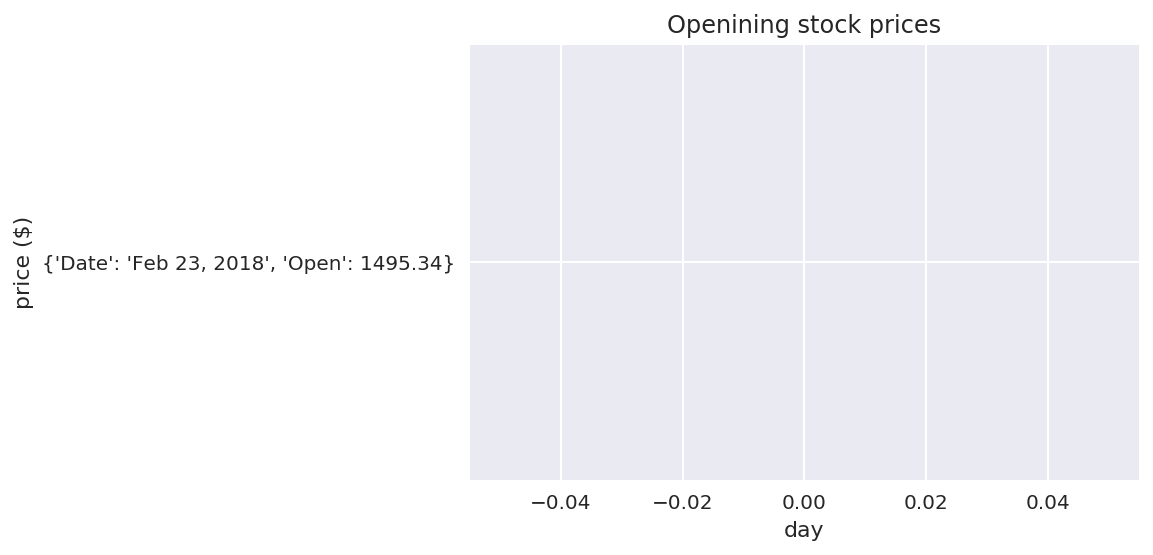

{'Date': 'Feb 22, 2018', 'Open': 1495.36}


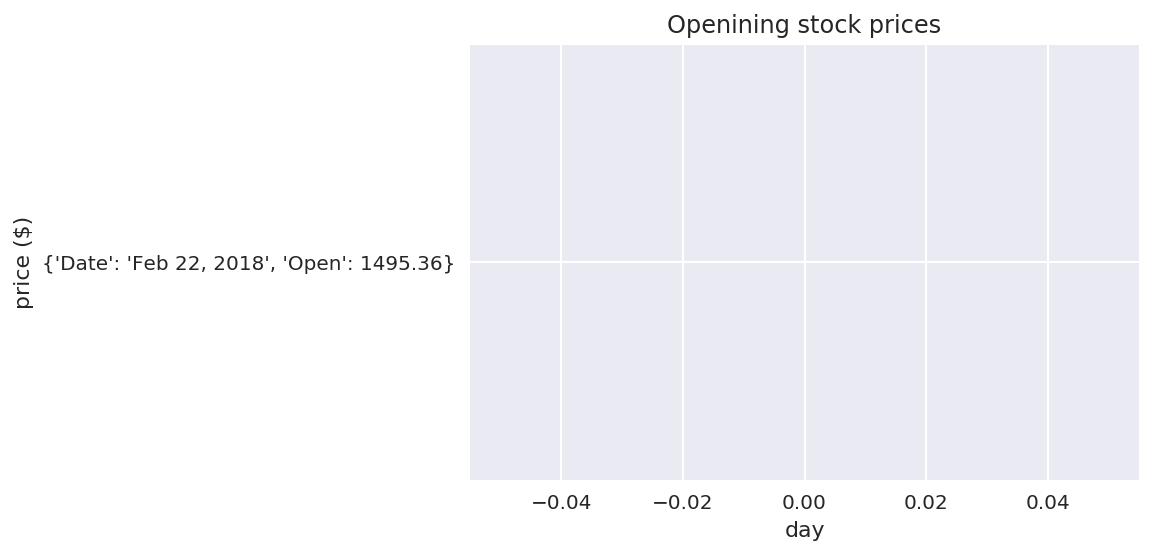

{'Date': 'Feb 21, 2018', 'Open': 1485.0}


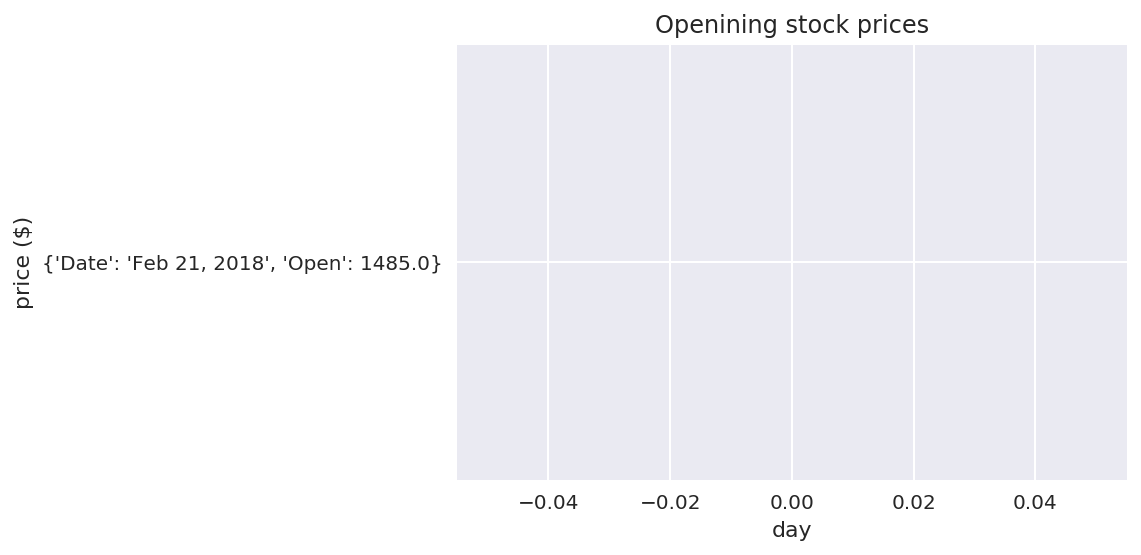

{'Date': 'Feb 20, 2018', 'Open': 1446.49}


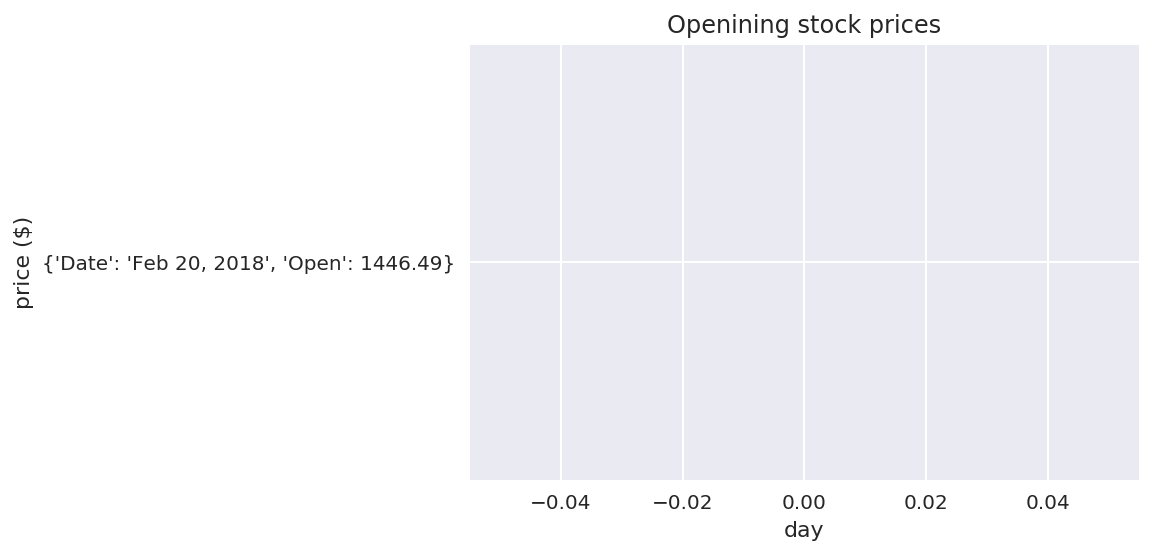

{'Date': 'Feb 16, 2018', 'Open': 1457.37}


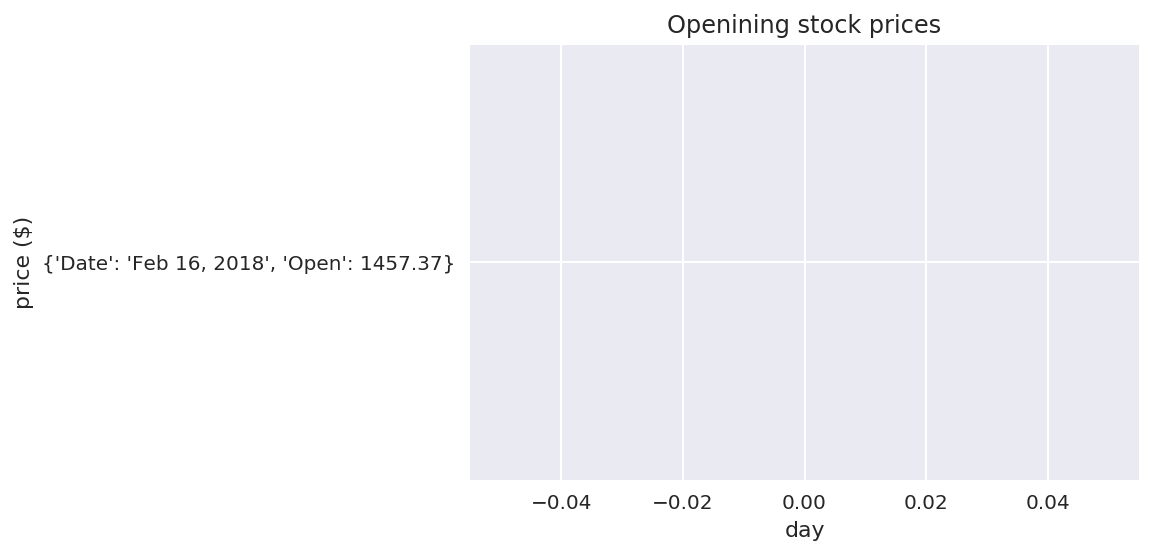

{'Date': 'Feb 15, 2018', 'Open': 1466.89}


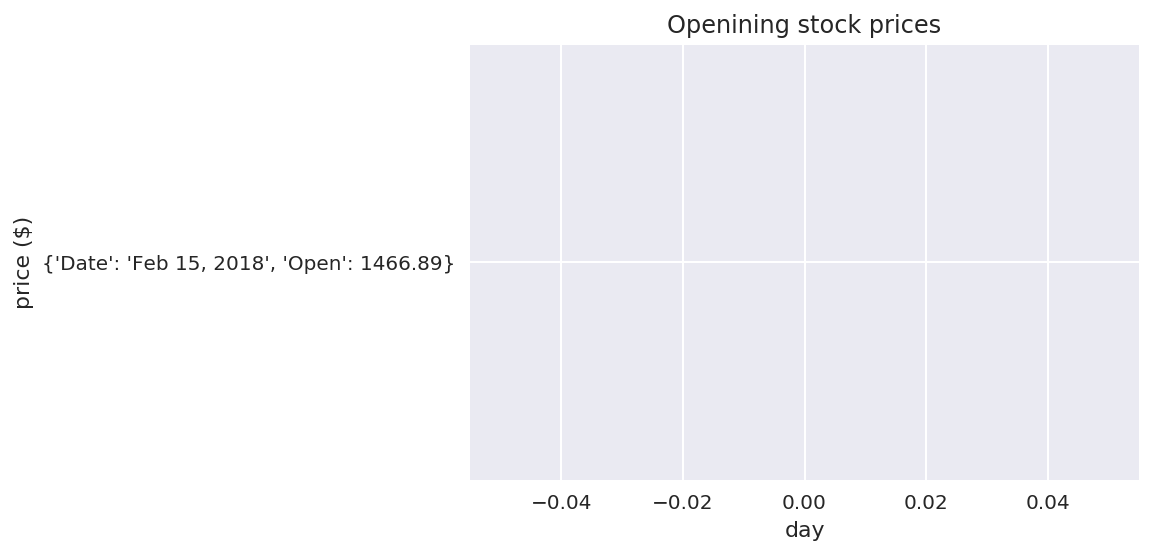

{'Date': 'Feb 14, 2018', 'Open': 1406.25}


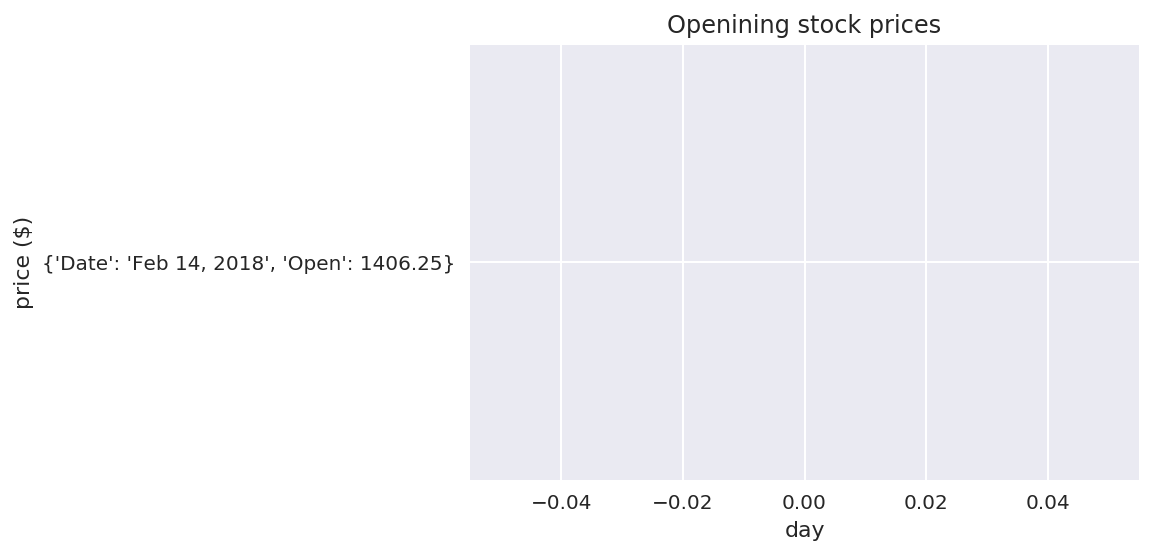

{'Date': 'Feb 13, 2018', 'Open': 1385.93}


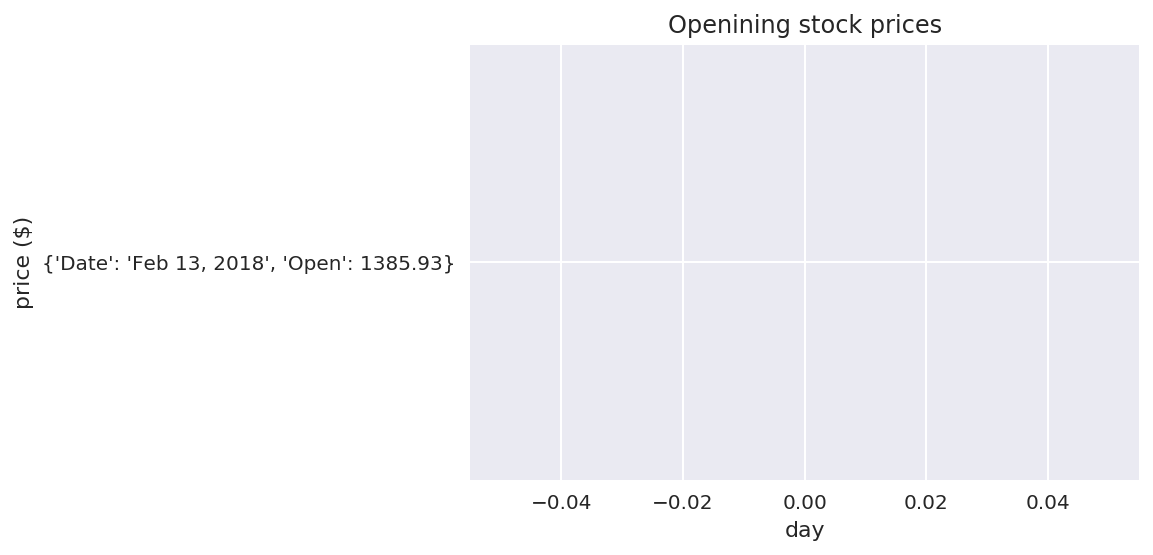

{'Date': 'Feb 12, 2018', 'Open': 1364.67}


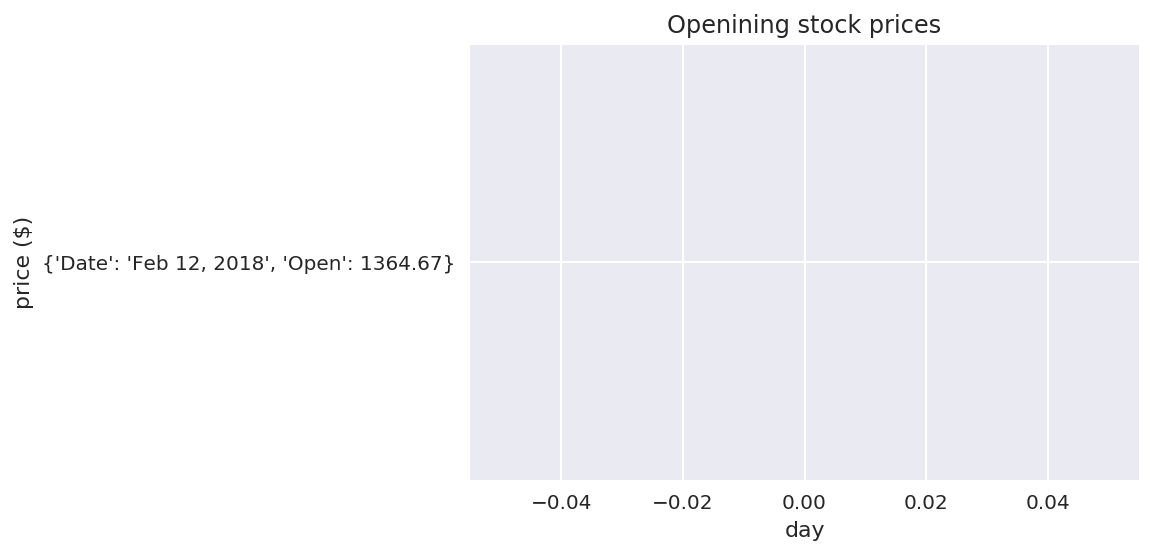

{'Date': 'Feb 09, 2018', 'Open': 1373.49}


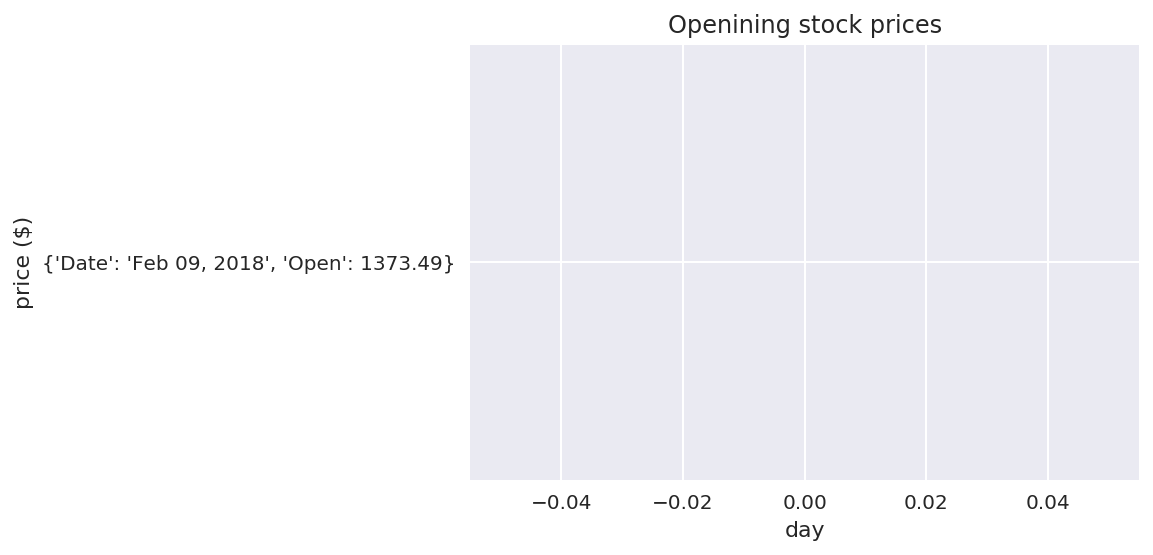

{'Date': 'Feb 08, 2018', 'Open': 1429.68}


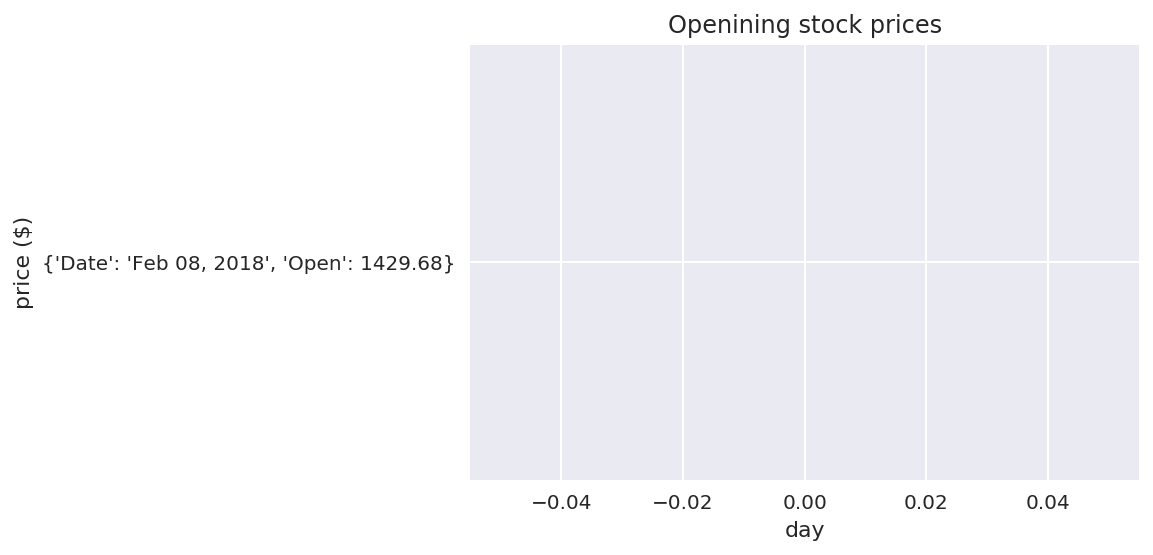

{'Date': 'Feb 07, 2018', 'Open': 1449.0}


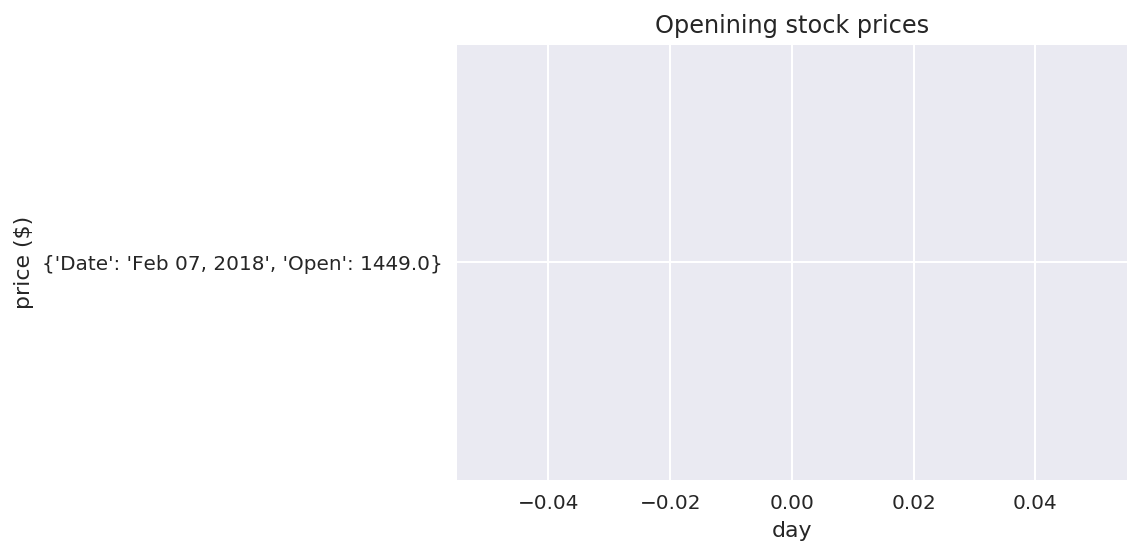

{'Date': 'Feb 06, 2018', 'Open': 1361.46}


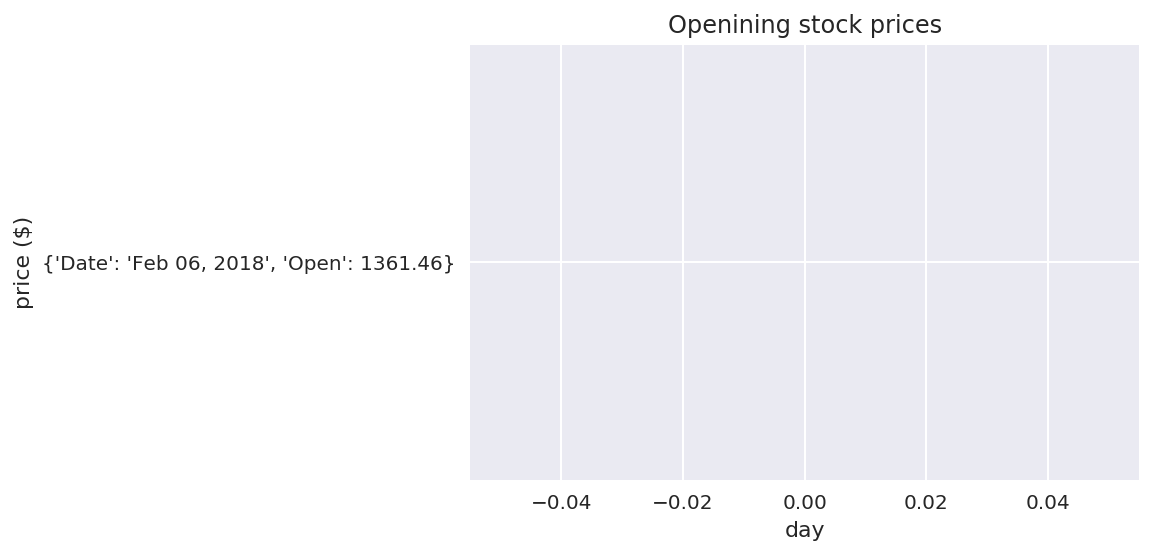

{'Date': 'Feb 05, 2018', 'Open': 1402.62}


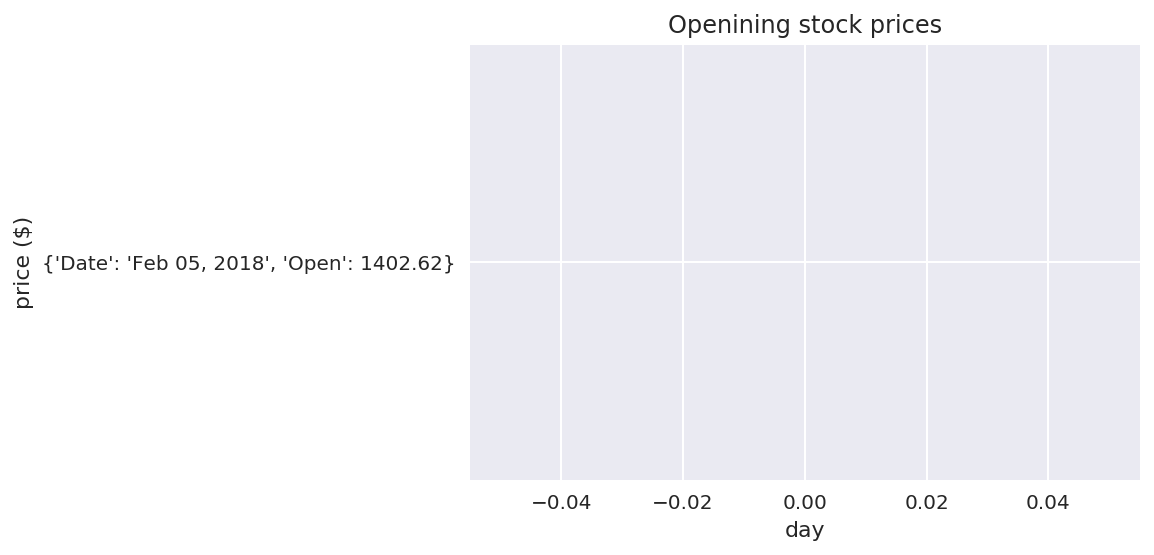

{'Date': 'Feb 02, 2018', 'Open': 1477.39}


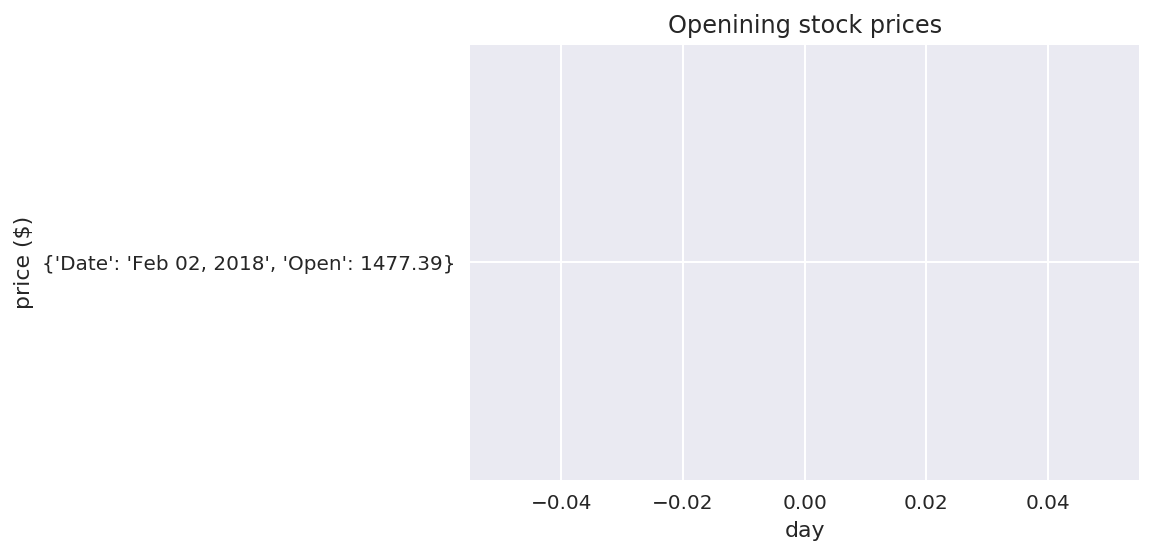

{'Date': 'Feb 01, 2018', 'Open': 1445.0}


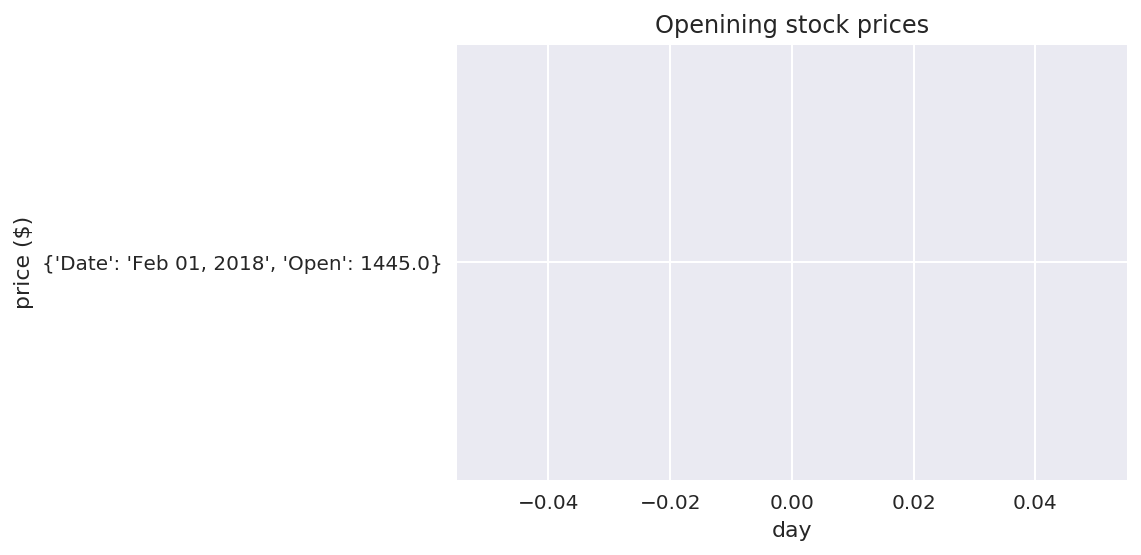

{'Date': 'Jan 31, 2018', 'Open': 1451.3}


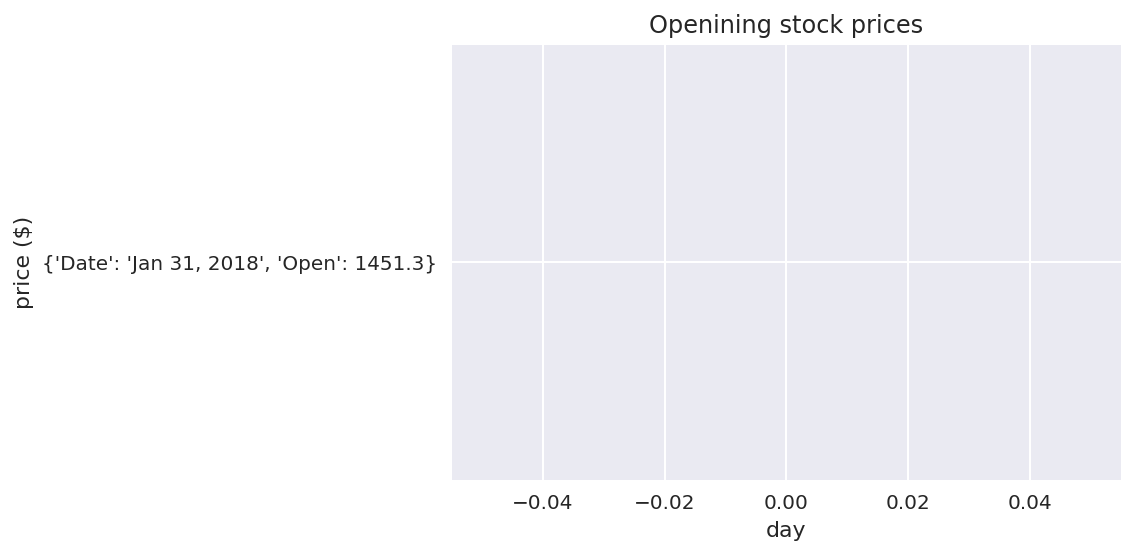

{'Date': 'Jan 30, 2018', 'Open': 1403.17}


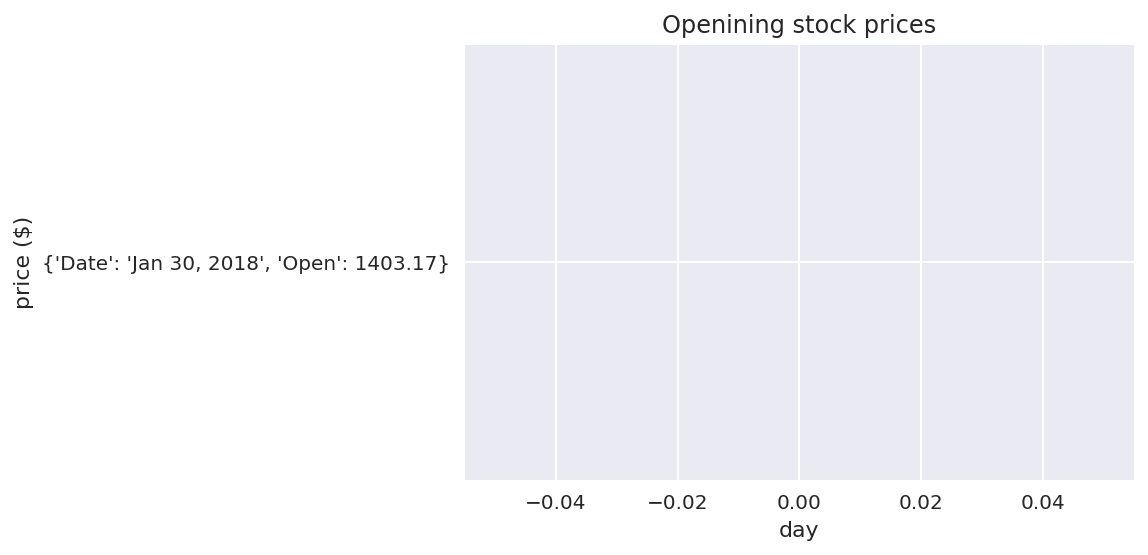

{'Date': 'Jan 29, 2018', 'Open': 1409.18}


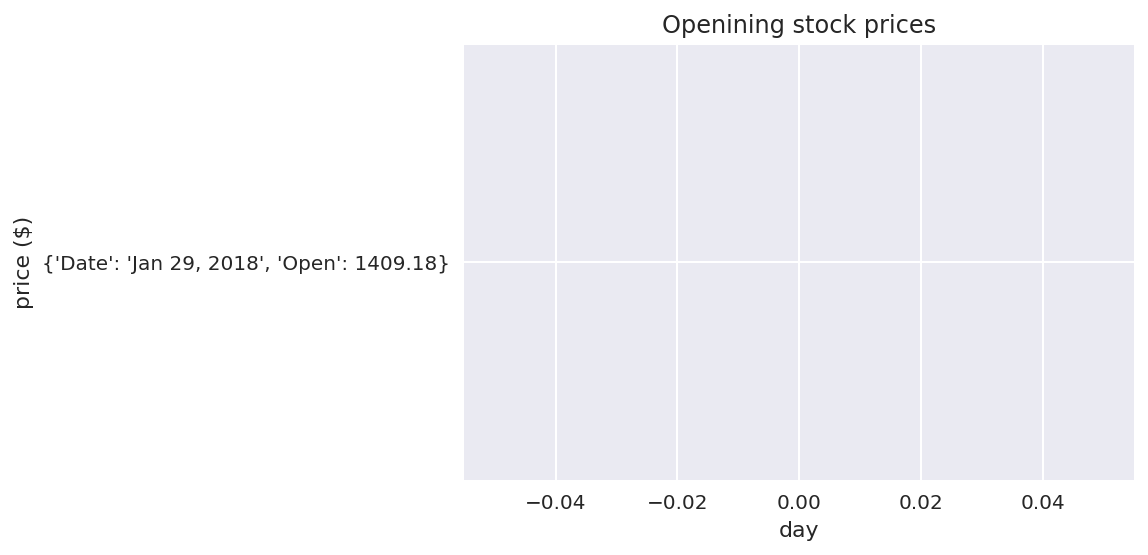

{'Date': 'Jan 26, 2018', 'Open': 1392.01}


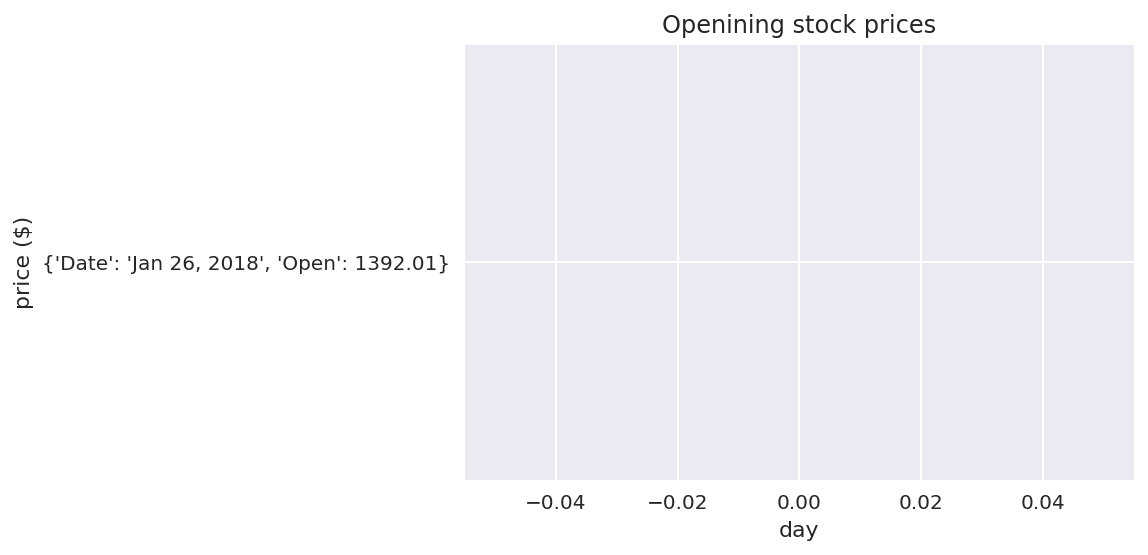

{'Date': 'Jan 25, 2018', 'Open': 1368.0}


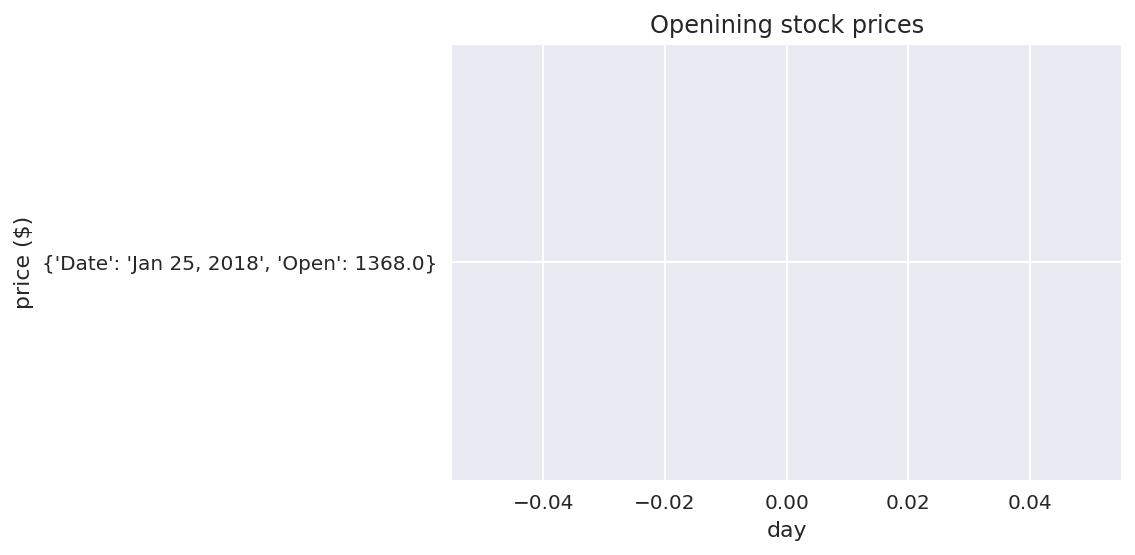

{'Date': 'Jan 24, 2018', 'Open': 1374.82}


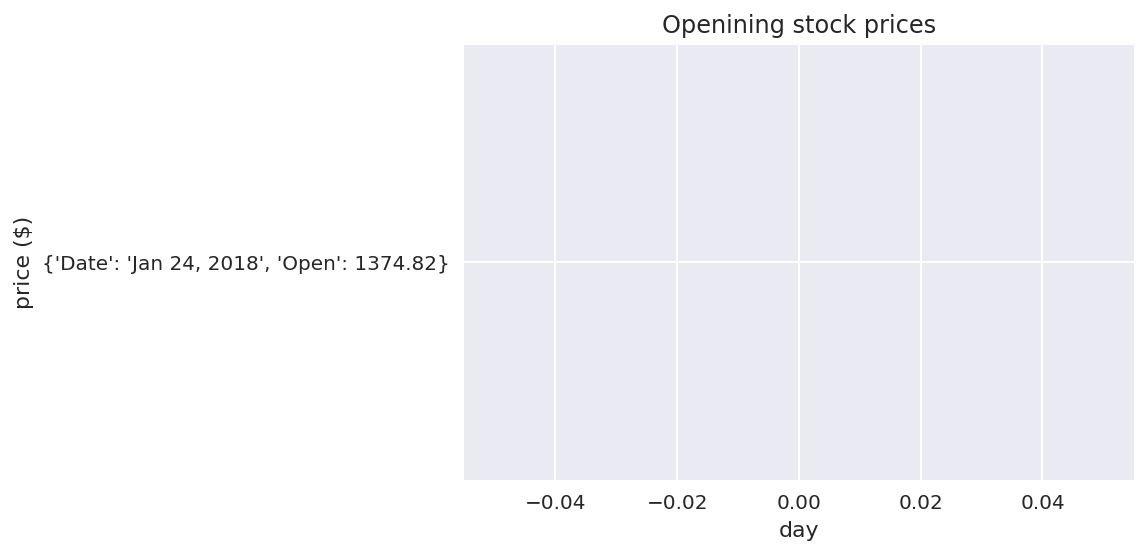

{'Date': 'Jan 23, 2018', 'Open': 1338.09}


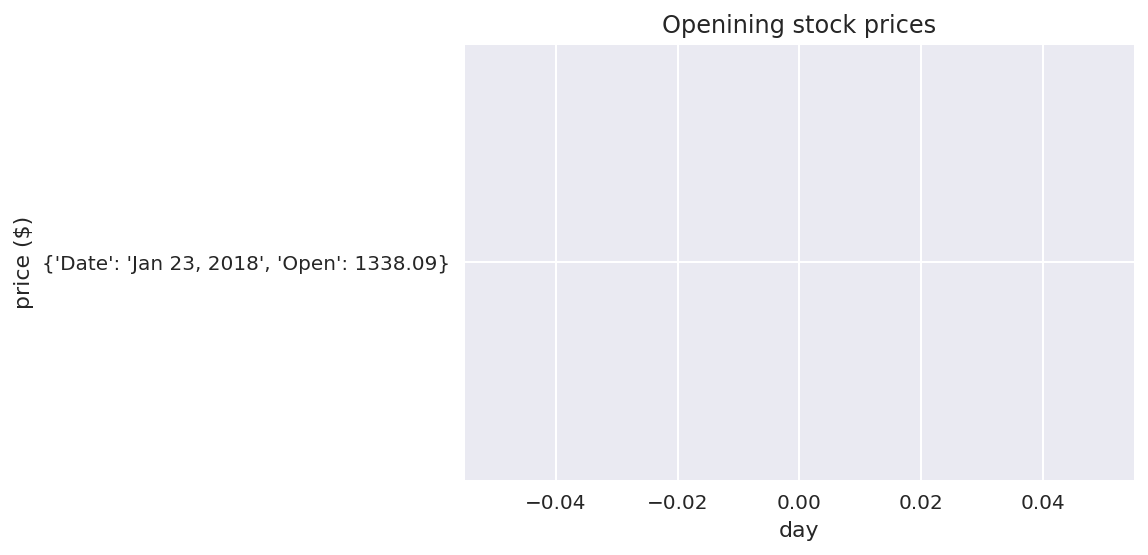

{'Date': 'Jan 22, 2018', 'Open': 1297.17}


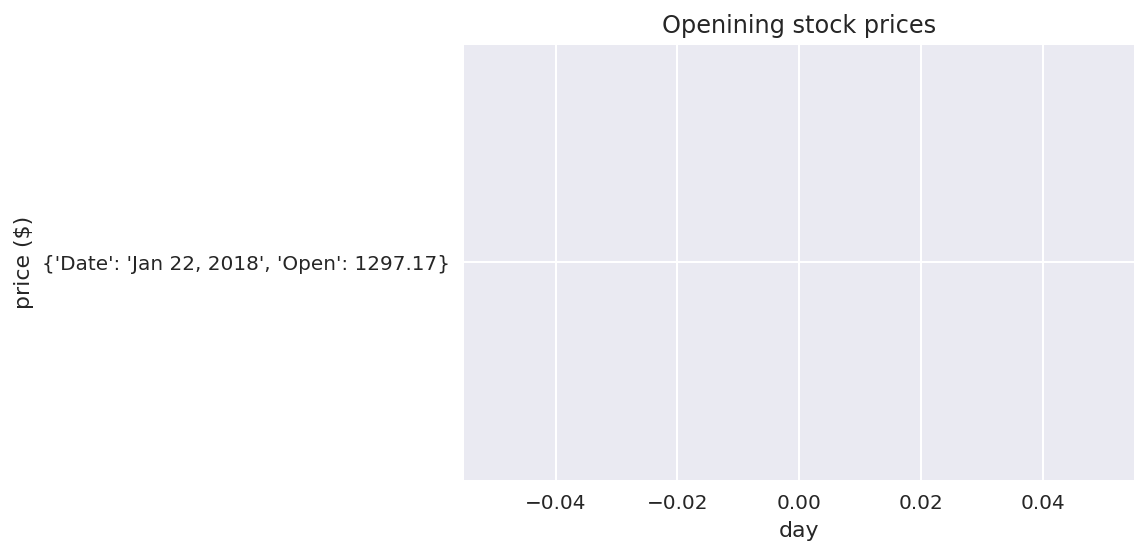

{'Date': 'Jan 19, 2018', 'Open': 1312.0}


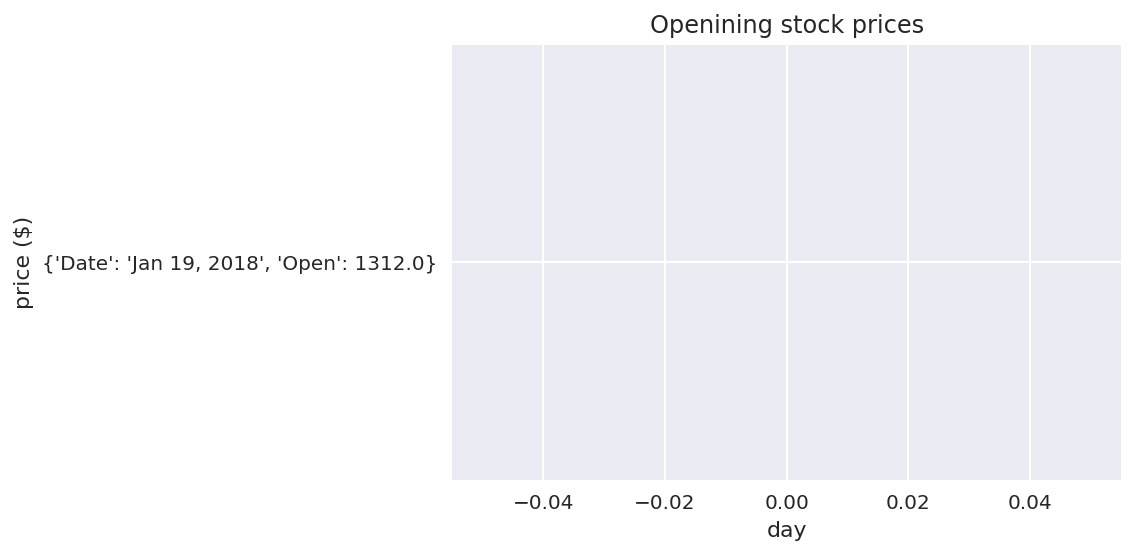

{'Date': 'Jan 18, 2018', 'Open': 1293.95}


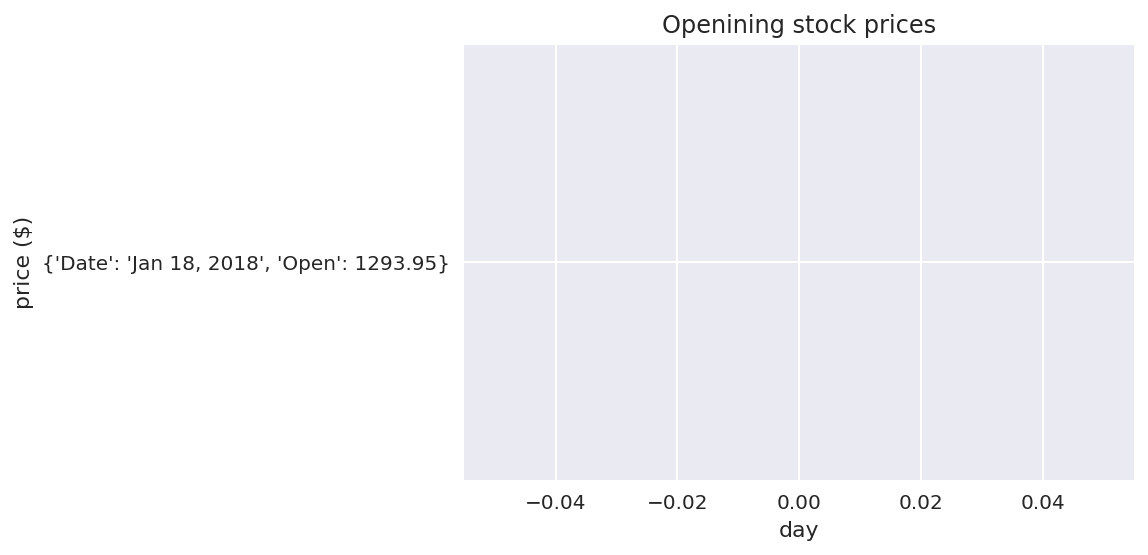

{'Date': 'Jan 17, 2018', 'Open': 1312.24}


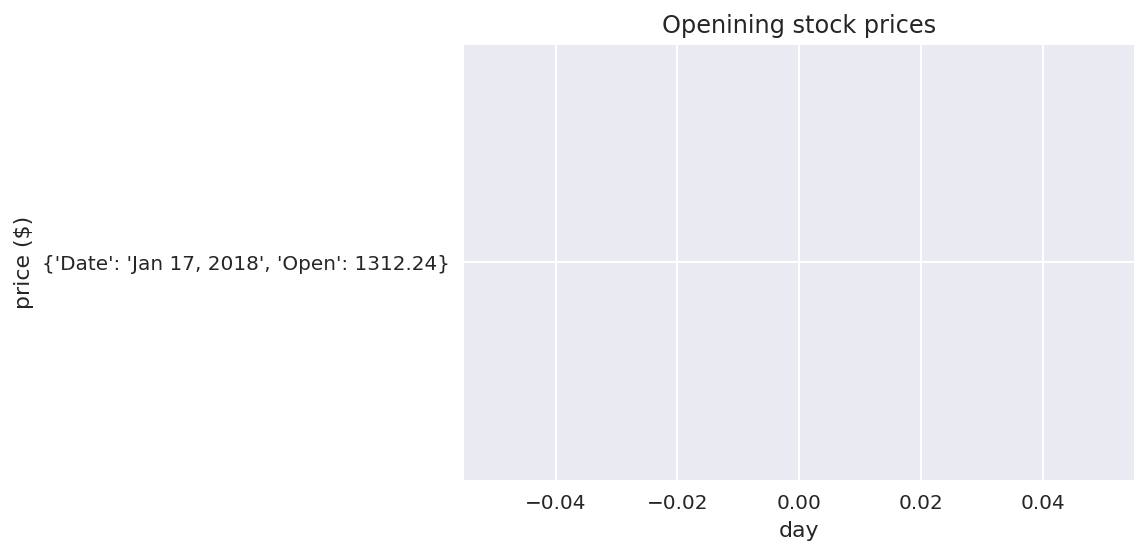

{'Date': 'Jan 16, 2018', 'Open': 1323.0}


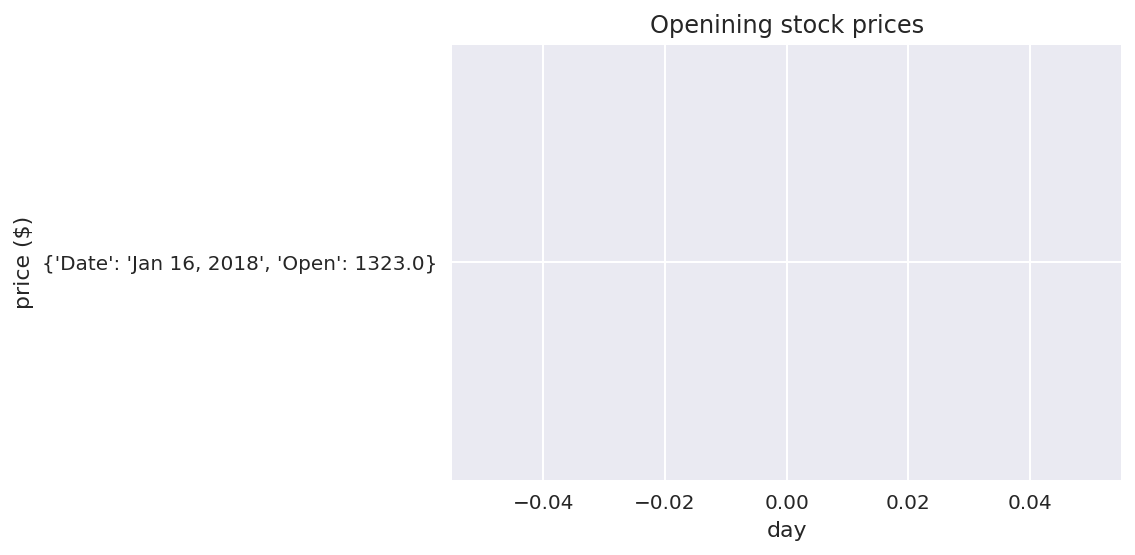

{'Date': 'Jan 12, 2018', 'Open': 1273.39}


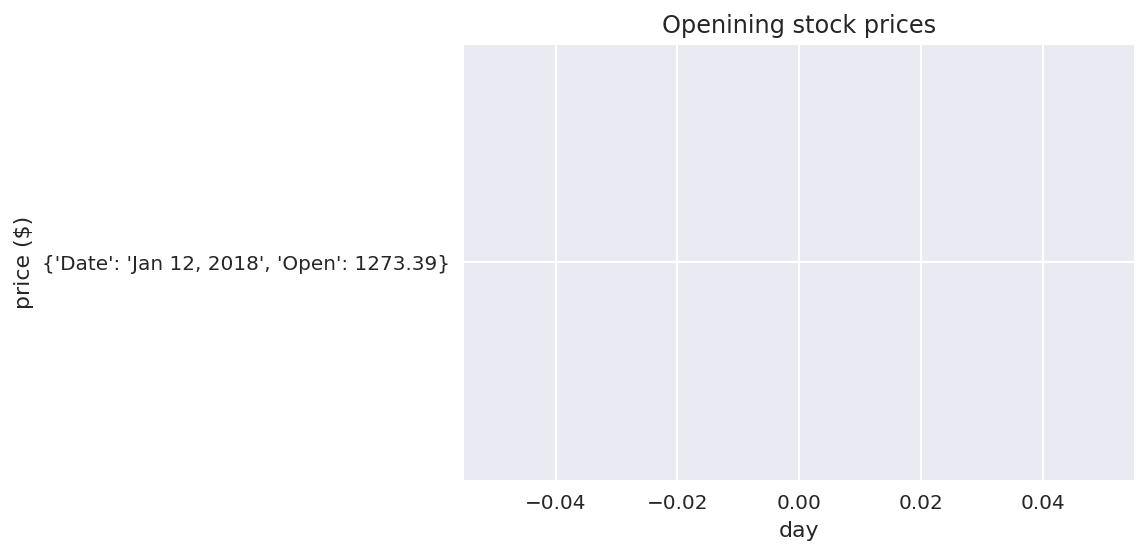

{'Date': 'Jan 11, 2018', 'Open': 1259.74}


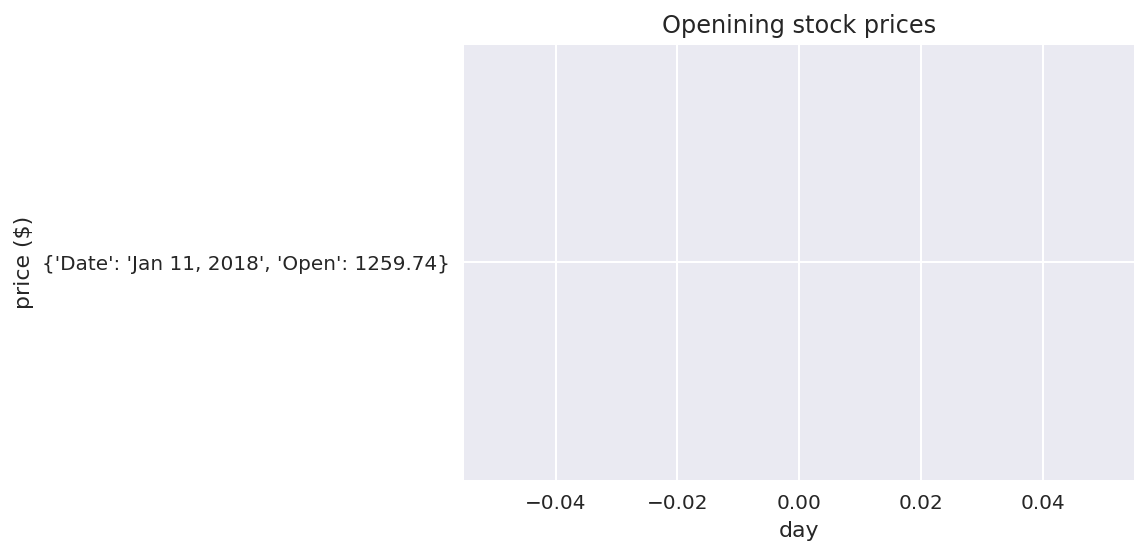

{'Date': 'Jan 10, 2018', 'Open': 1245.15}


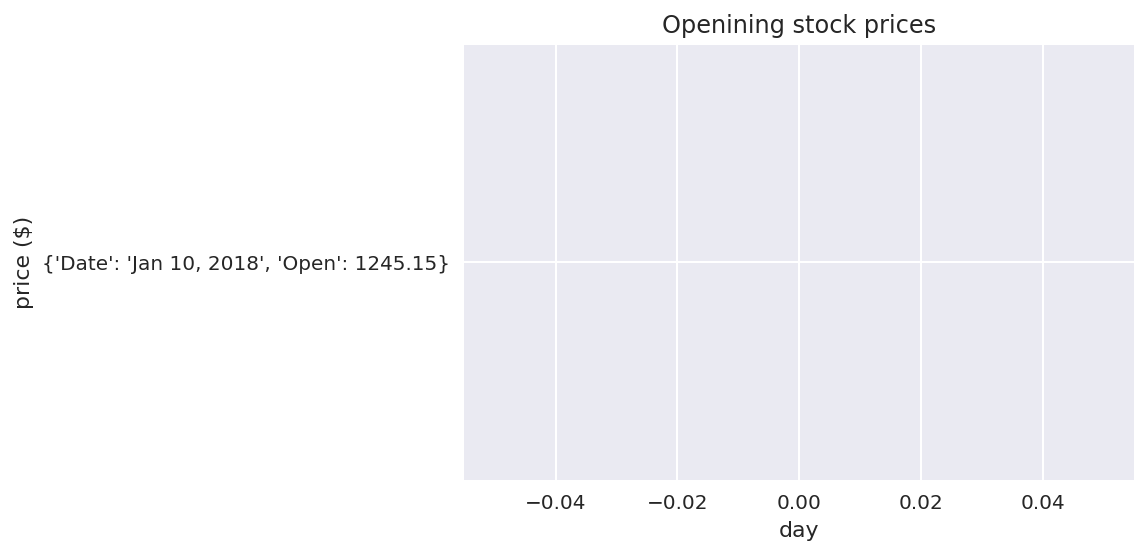

{'Date': 'Jan 09, 2018', 'Open': 1256.9}


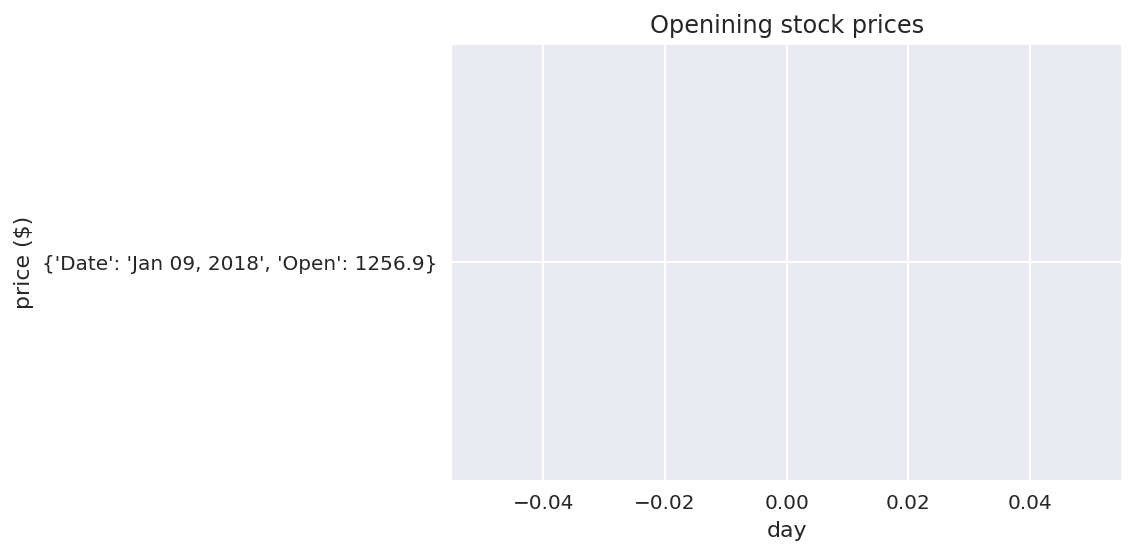

{'Date': 'Jan 08, 2018', 'Open': 1236.0}


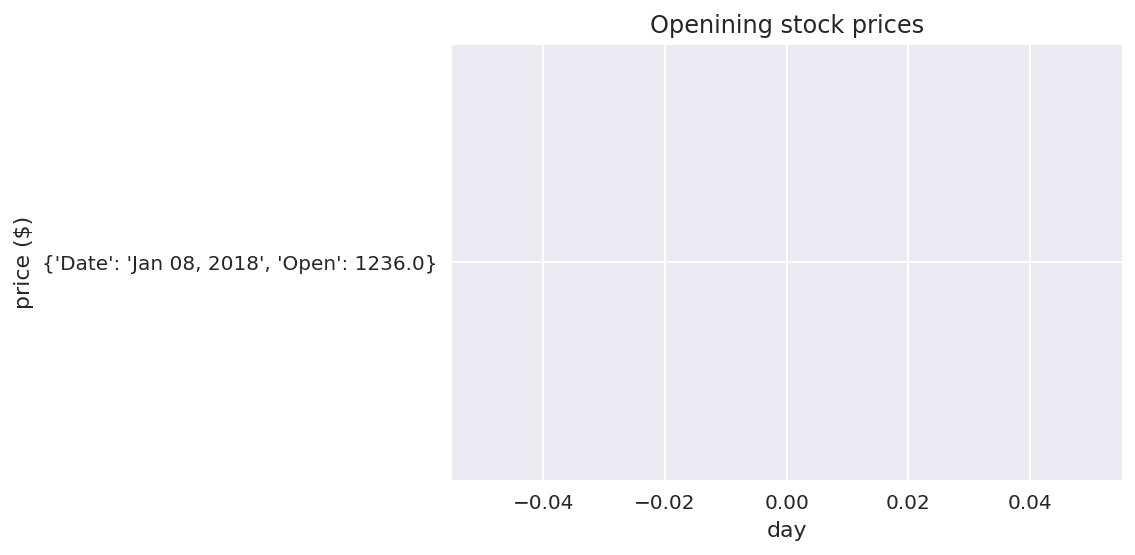

{'Date': 'Jan 05, 2018', 'Open': 1217.51}


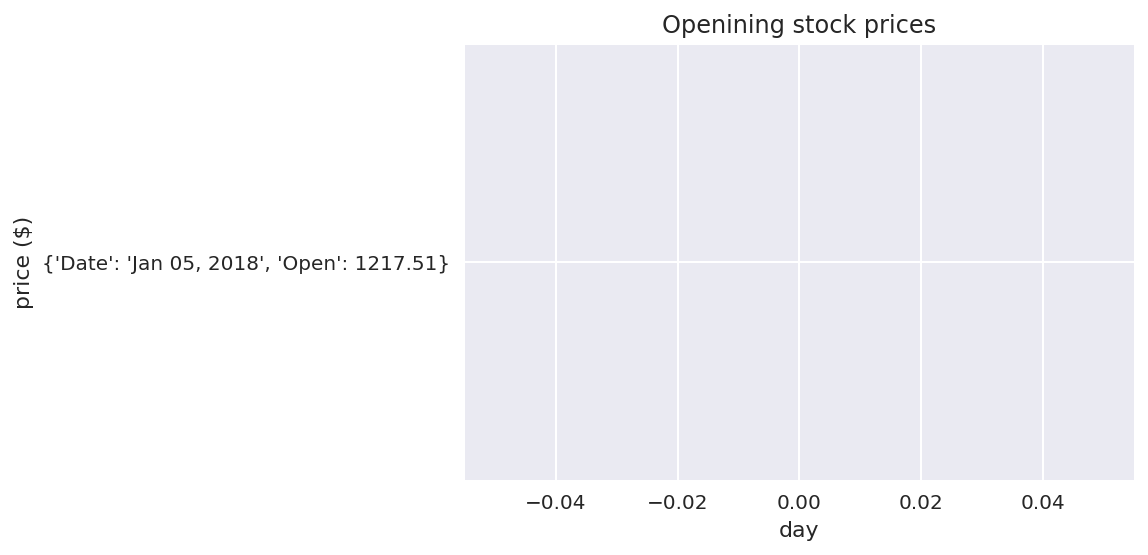

{'Date': 'Jan 04, 2018', 'Open': 1205.0}


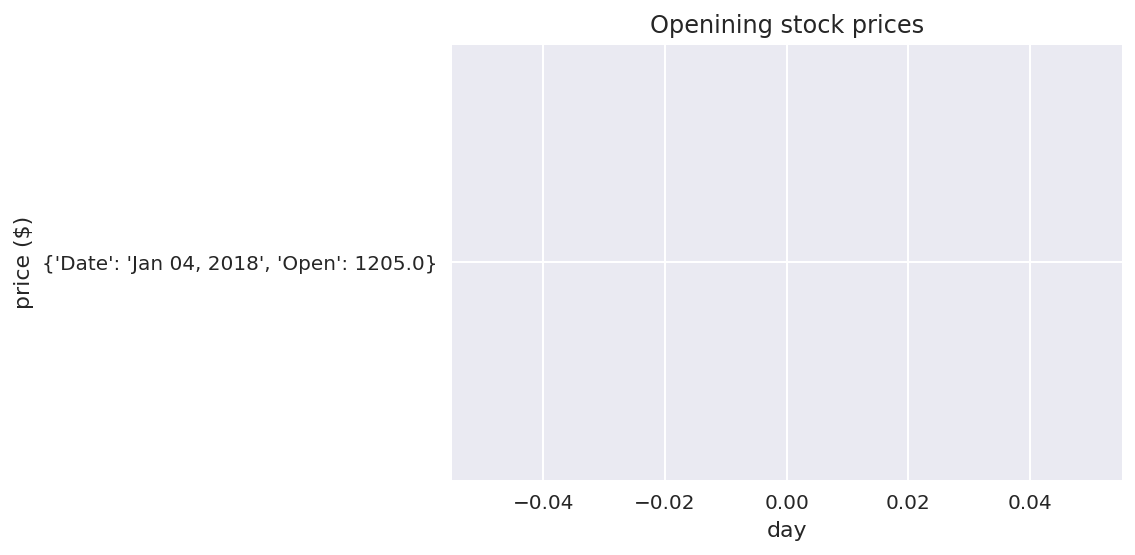

{'Date': 'Jan 03, 2018', 'Open': 1188.3}


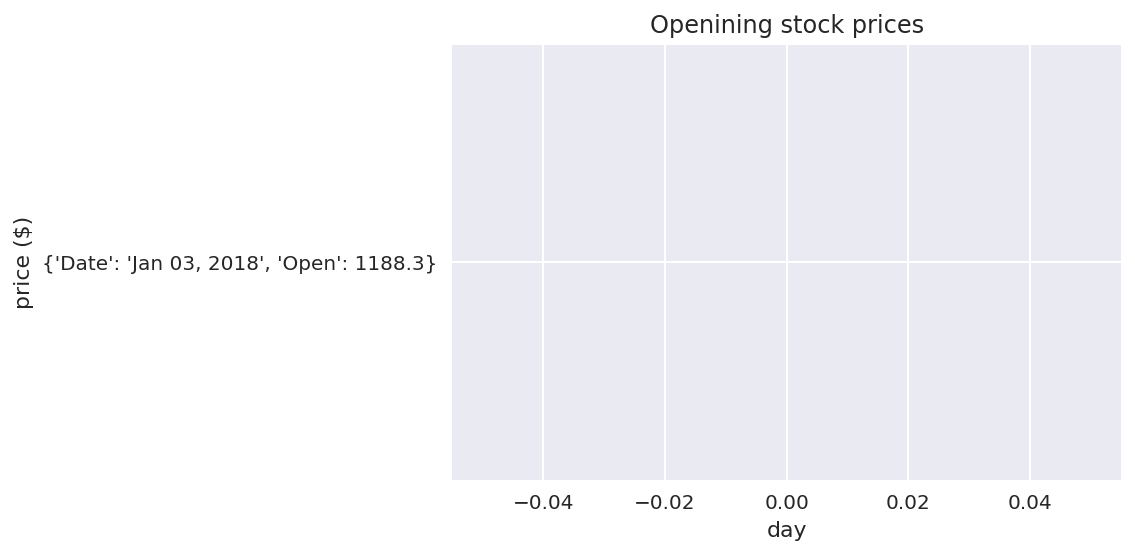

{'Date': 'Jan 02, 2018', 'Open': 1172.0}


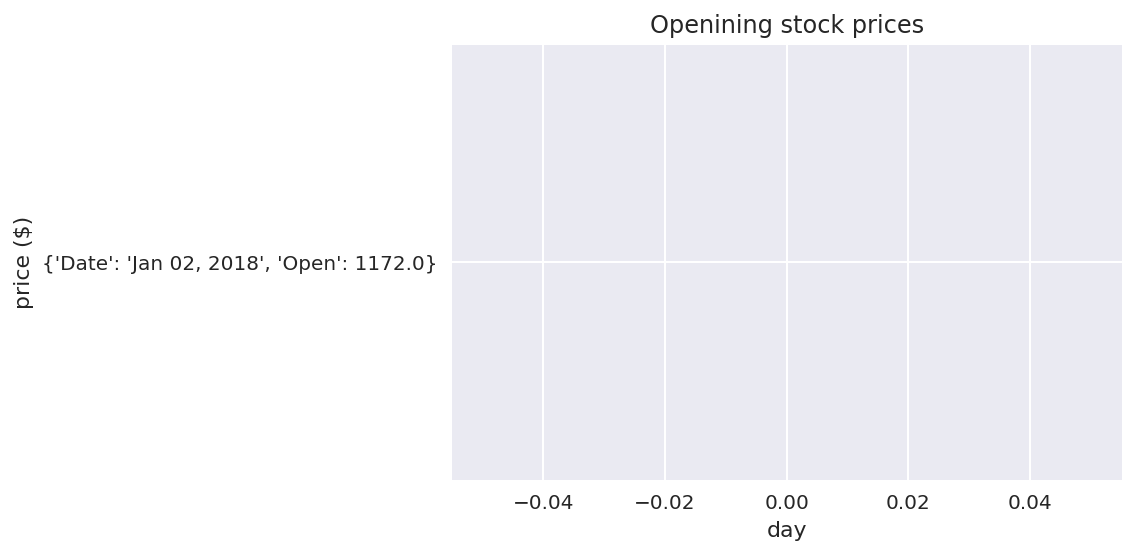

{'Date': 'Dec 29, 2017', 'Open': 1182.35}


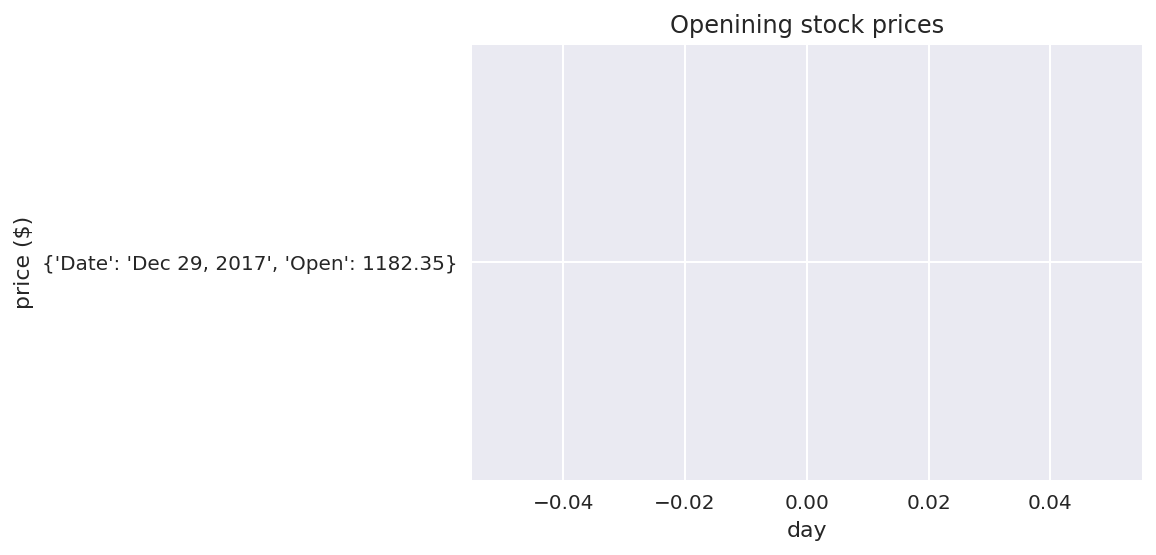

{'Date': 'Dec 28, 2017', 'Open': 1189.0}


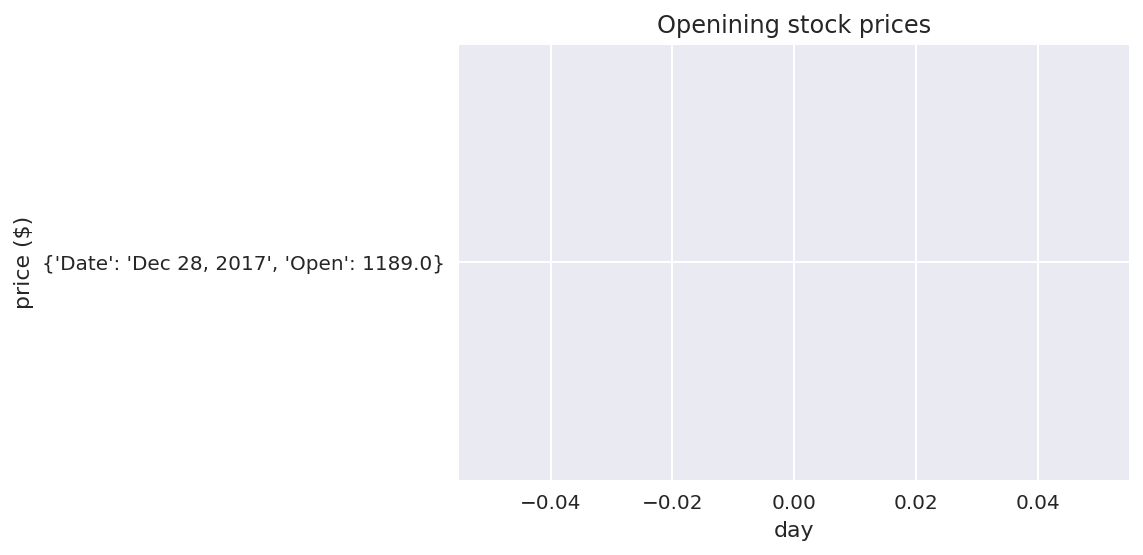

{'Date': 'Dec 27, 2017', 'Open': 1179.91}


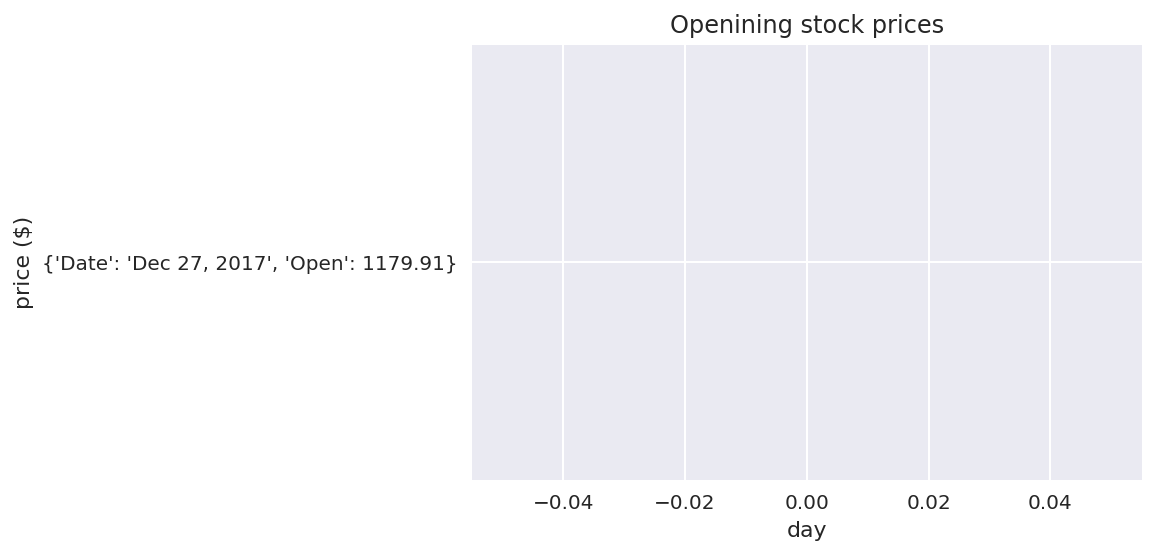

{'Date': 'Dec 26, 2017', 'Open': 1168.36}


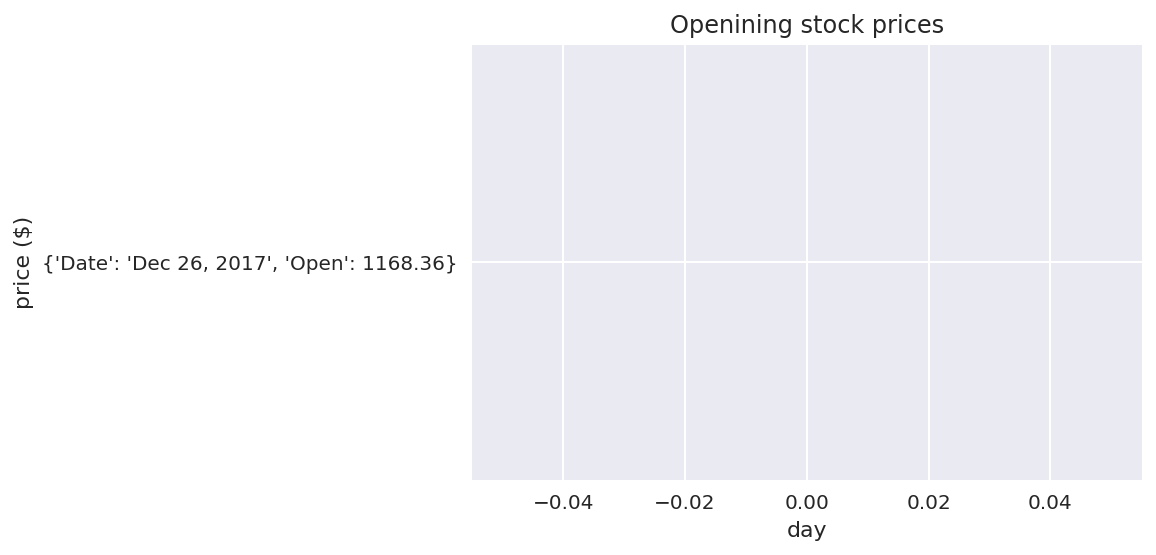

{'Date': 'Dec 22, 2017', 'Open': 1172.08}


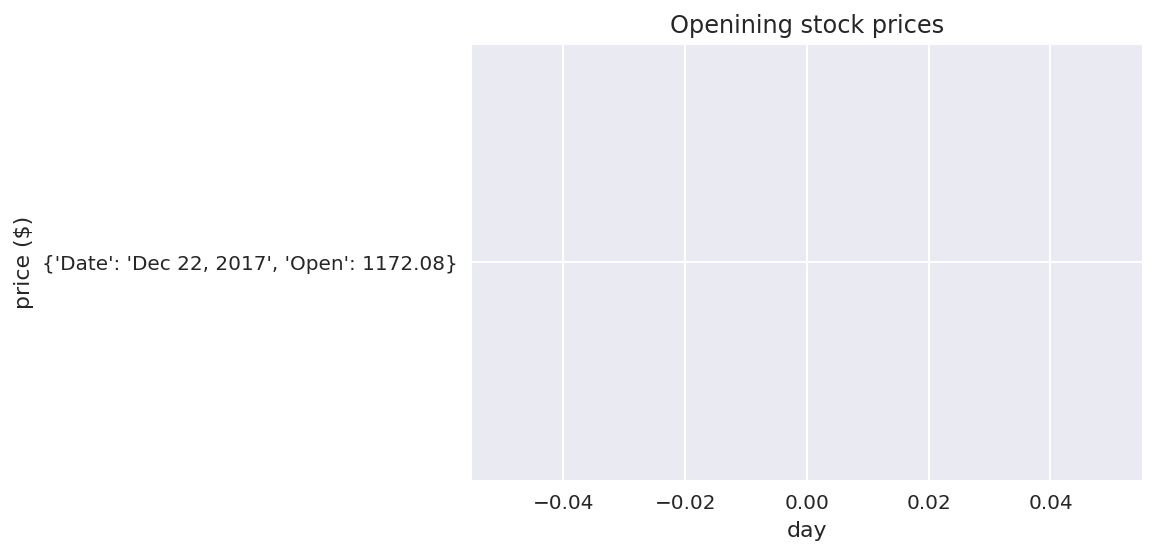

{'Date': 'Dec 21, 2017', 'Open': 1175.9}


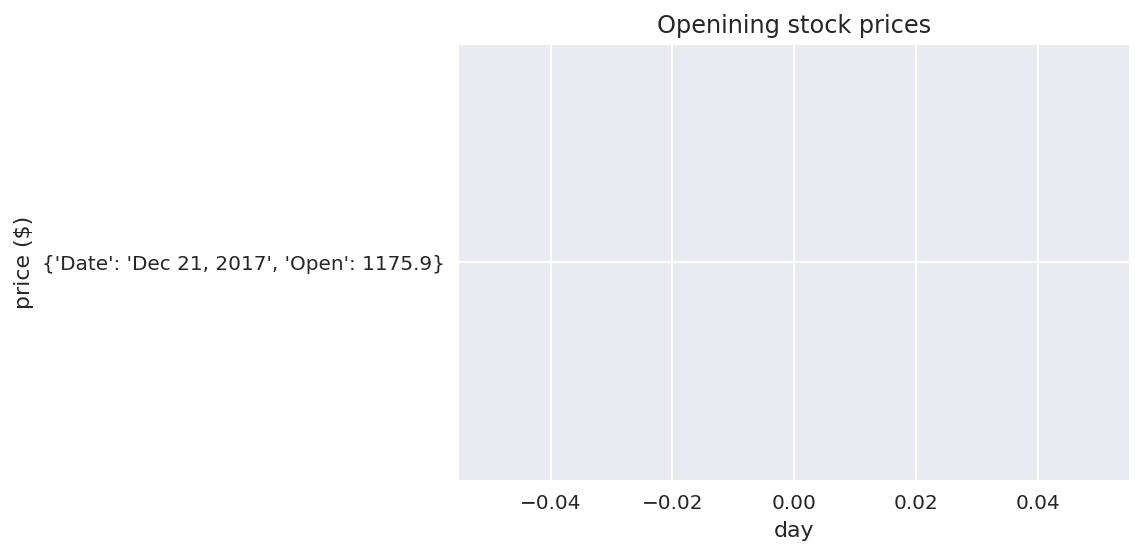

{'Date': 'Dec 20, 2017', 'Open': 1190.5}


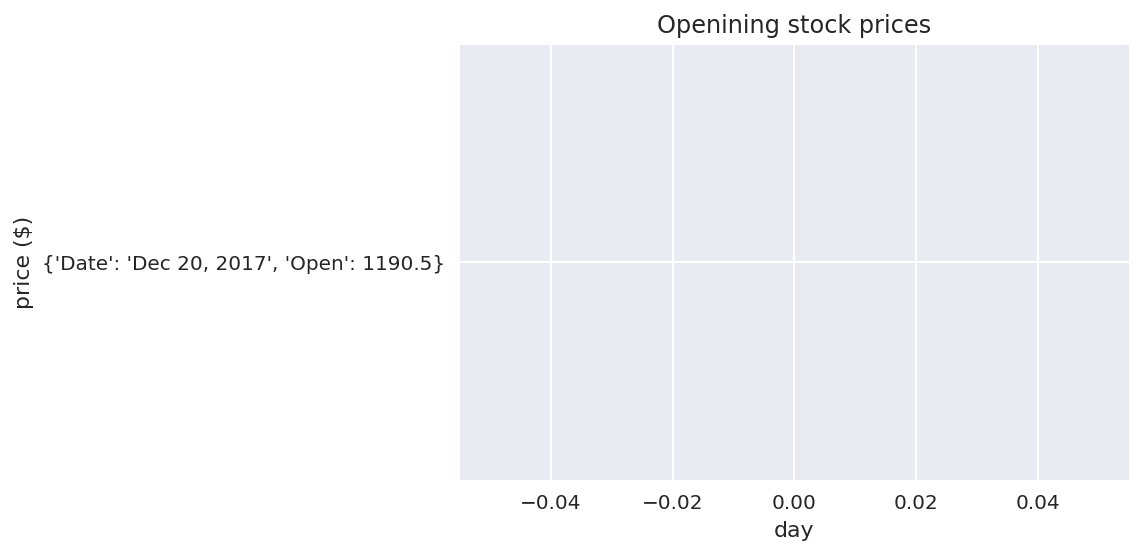

{'Date': 'Dec 19, 2017', 'Open': 1189.15}


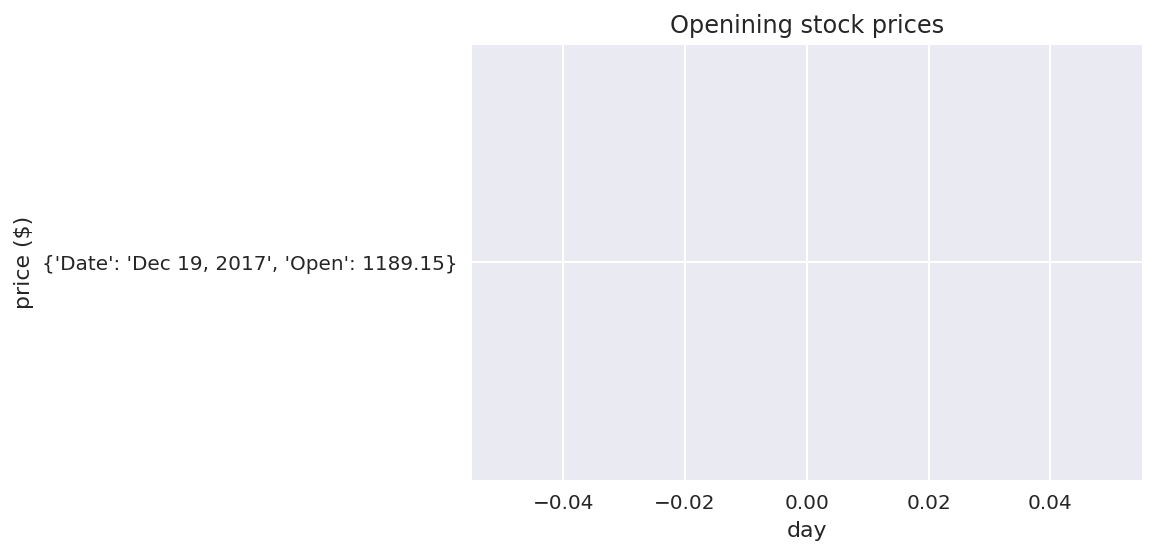

{'Date': 'Dec 18, 2017', 'Open': 1187.37}


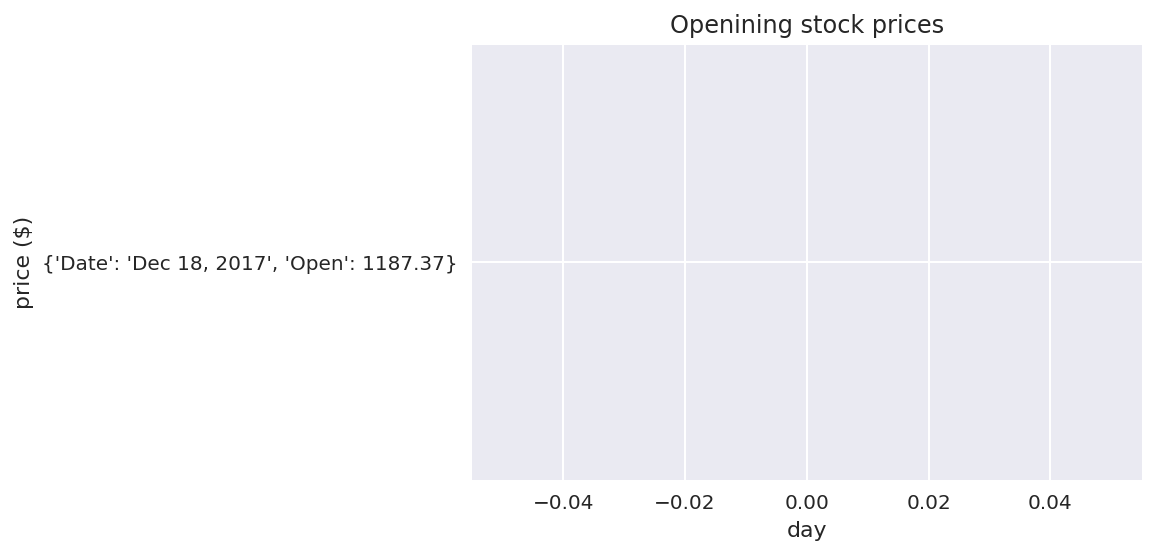

{'Date': 'Dec 15, 2017', 'Open': 1179.03}


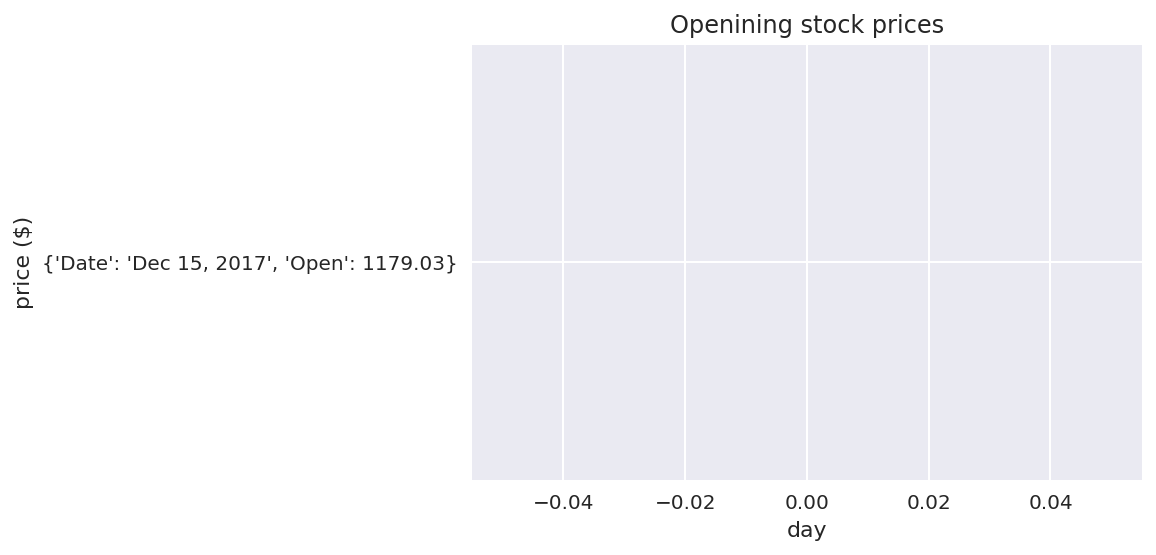

{'Date': 'Dec 14, 2017', 'Open': 1163.71}


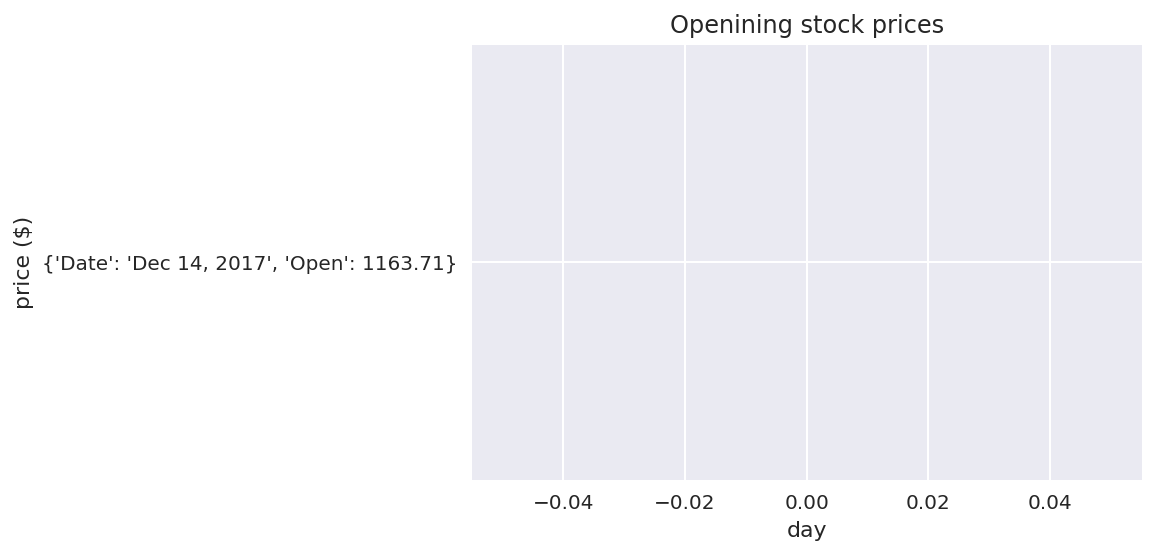

{'Date': 'Dec 13, 2017', 'Open': 1170.0}


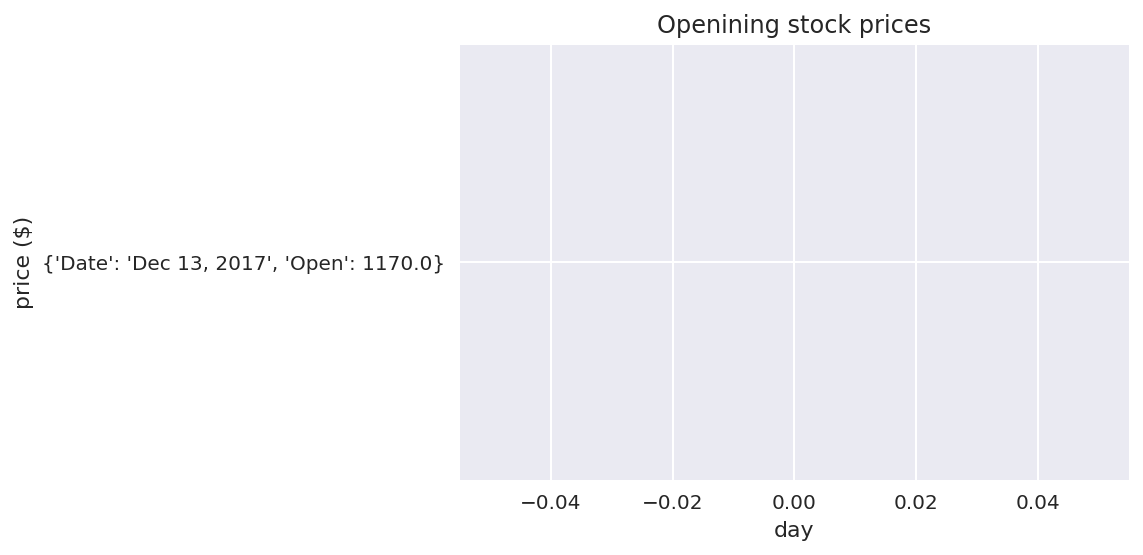

{'Date': 'Dec 12, 2017', 'Open': 1166.51}


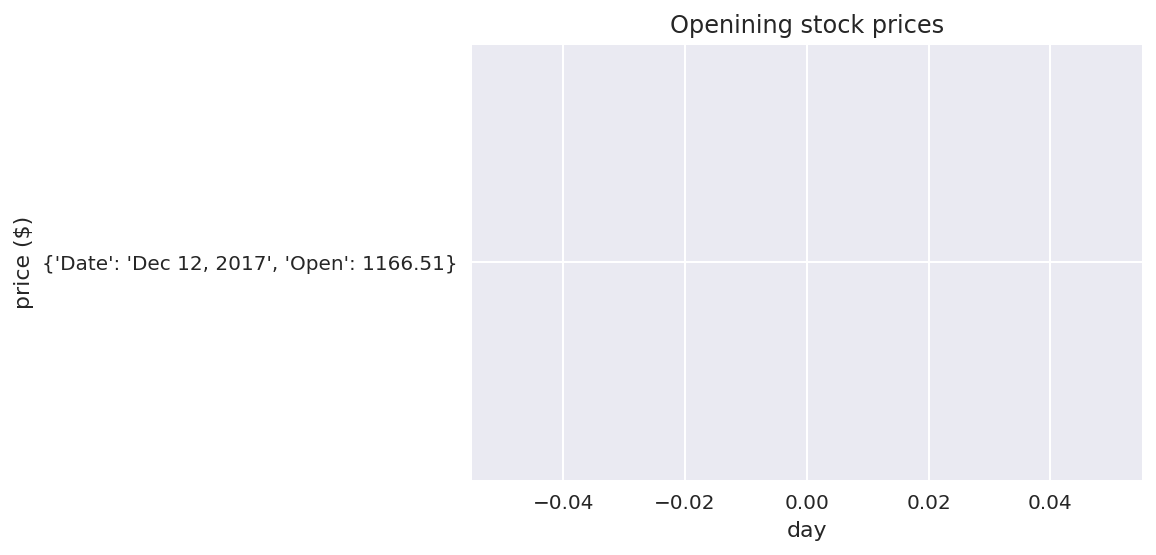

{'Date': 'Dec 11, 2017', 'Open': 1164.6}


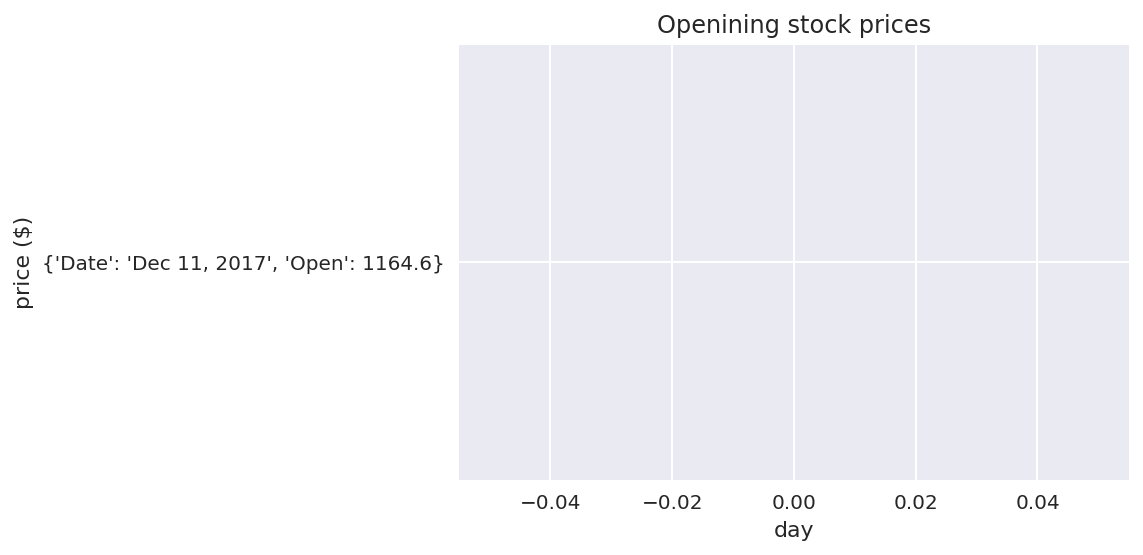

{'Date': 'Dec 08, 2017', 'Open': 1170.4}


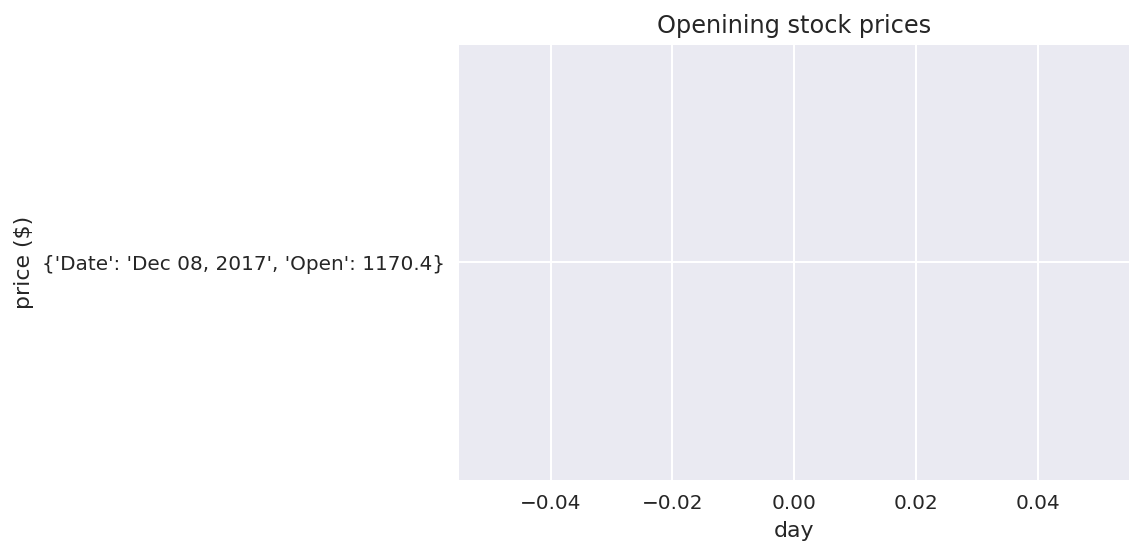

{'Date': 'Dec 07, 2017', 'Open': 1156.59}


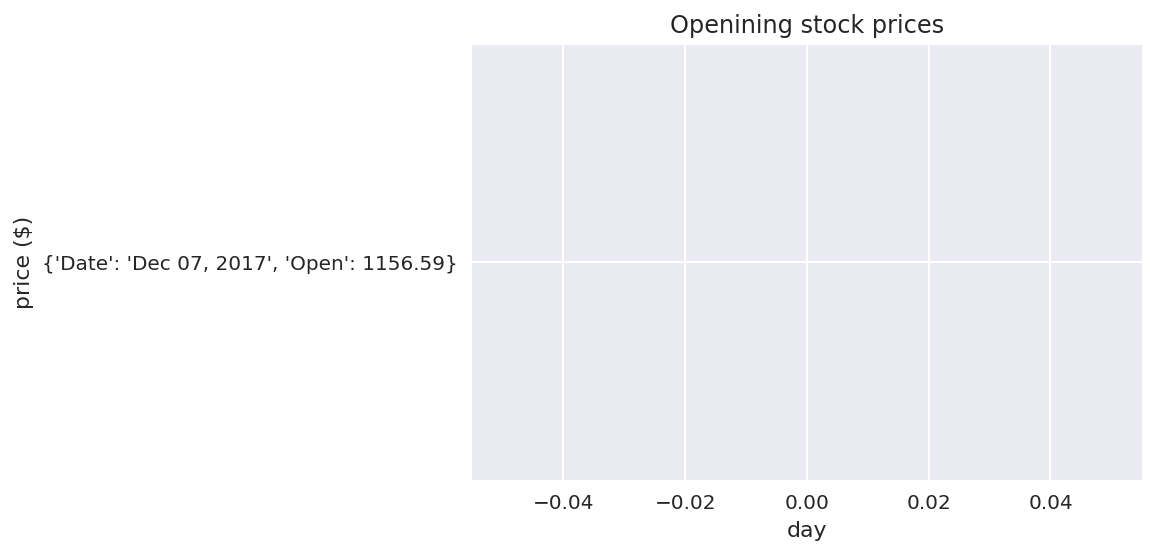

{'Date': 'Dec 06, 2017', 'Open': 1137.99}


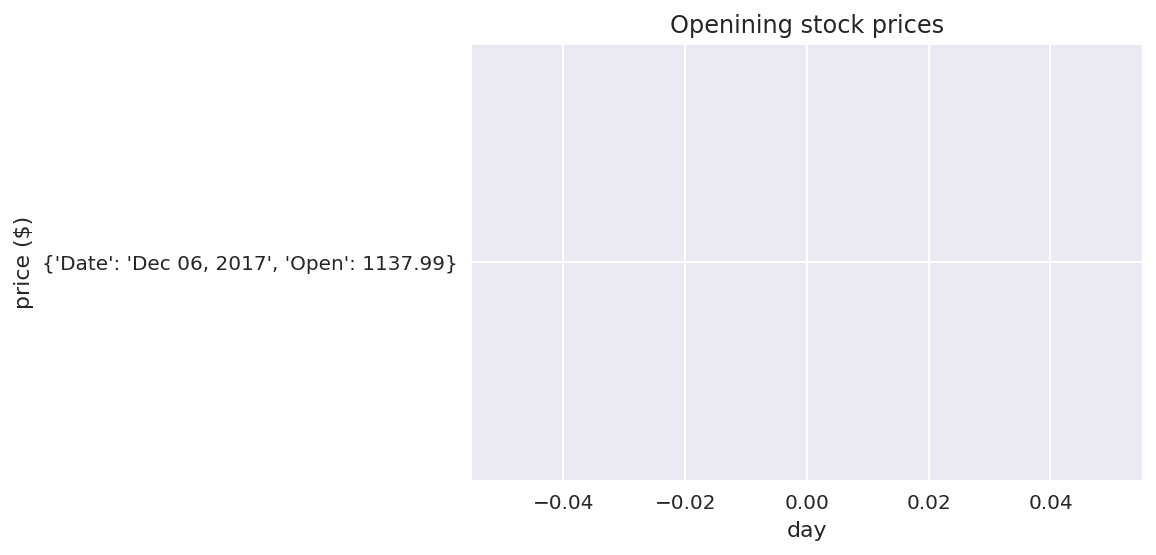

{'Date': 'Dec 05, 2017', 'Open': 1128.26}


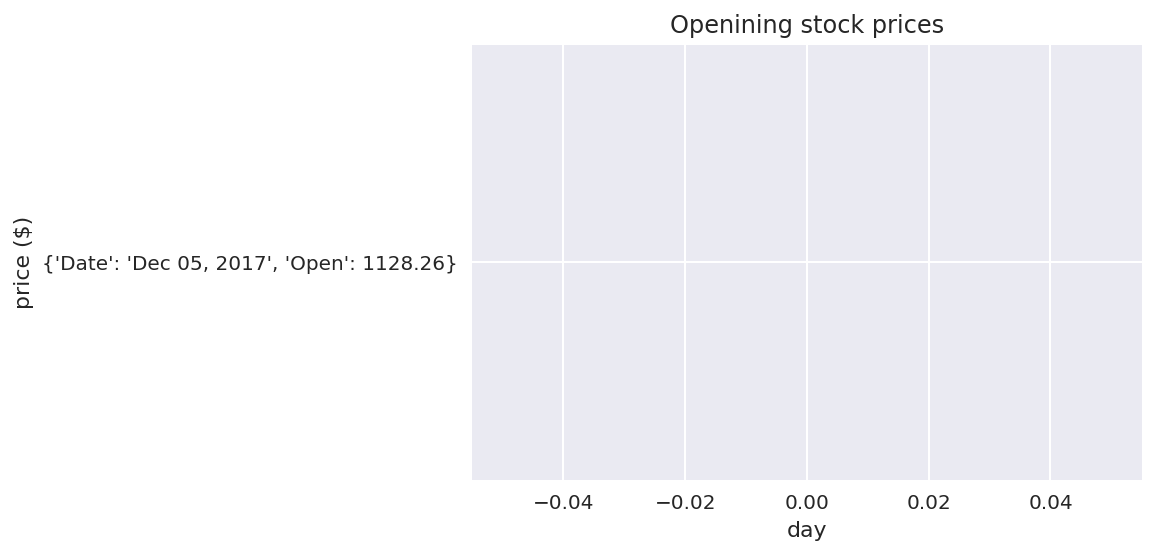

{'Date': 'Dec 04, 2017', 'Open': 1173.85}


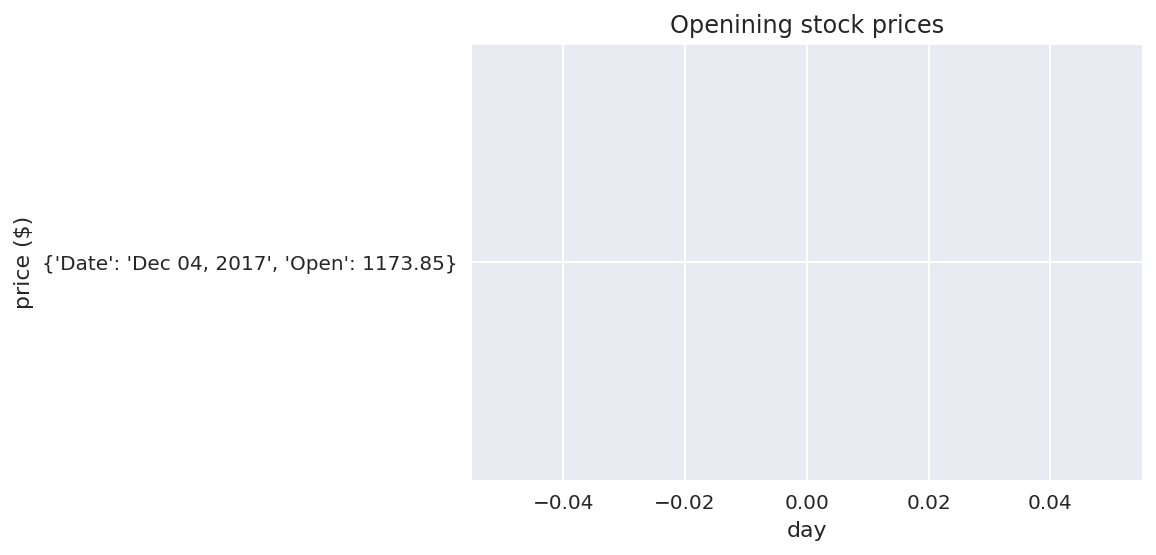

{'Date': 'Dec 01, 2017', 'Open': 1172.05}


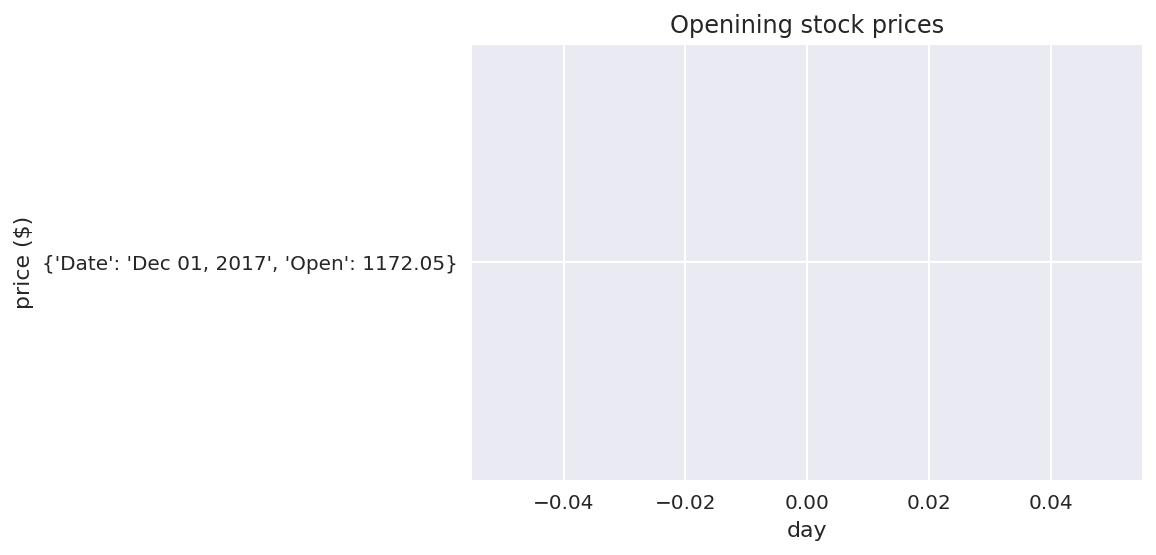

{'Date': 'Nov 30, 2017', 'Open': 1167.1}


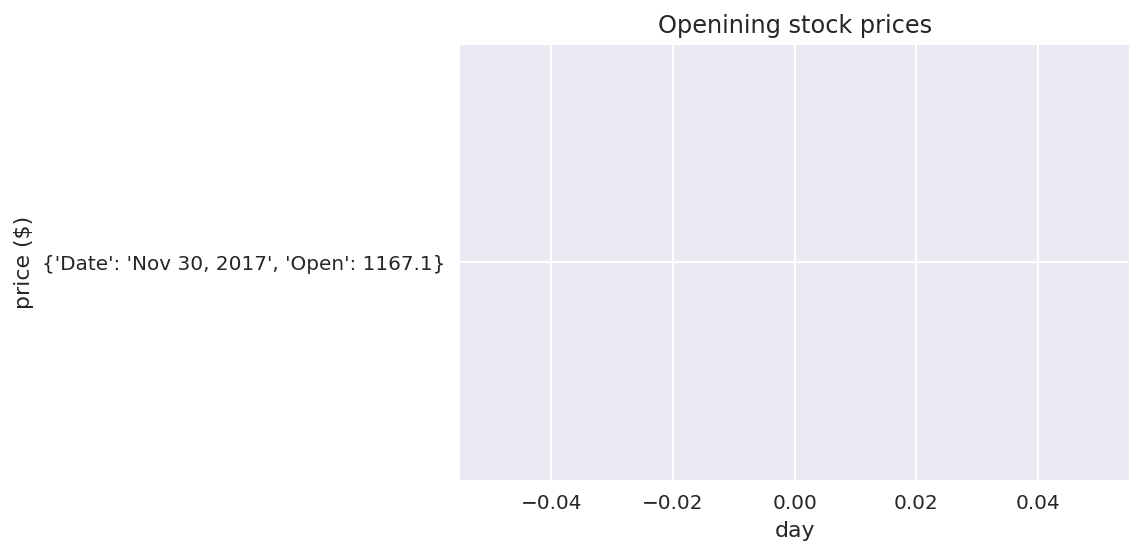

{'Date': 'Nov 29, 2017', 'Open': 1194.8}


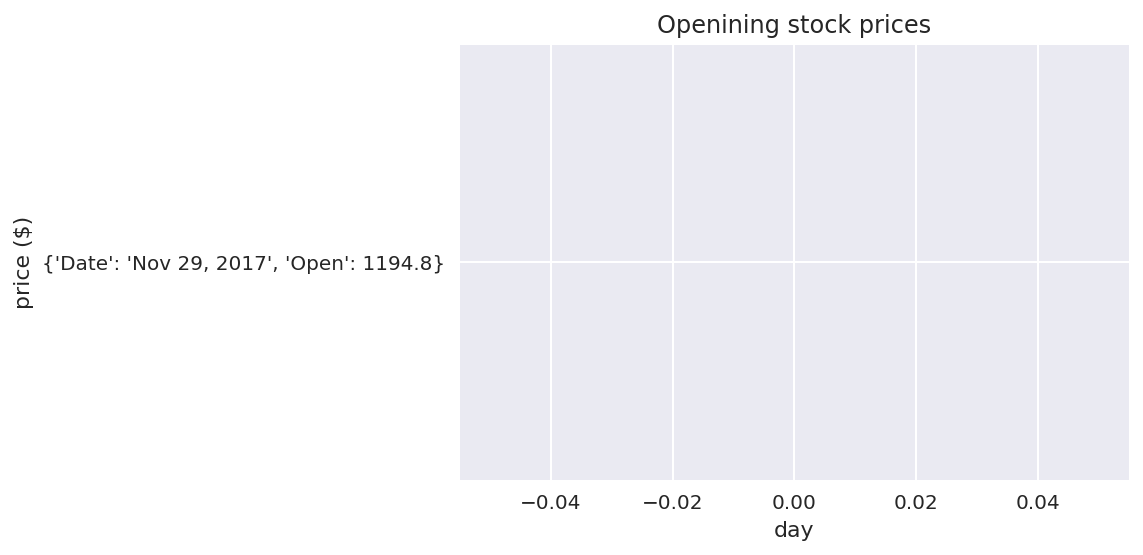

{'Date': 'Nov 28, 2017', 'Open': 1204.88}


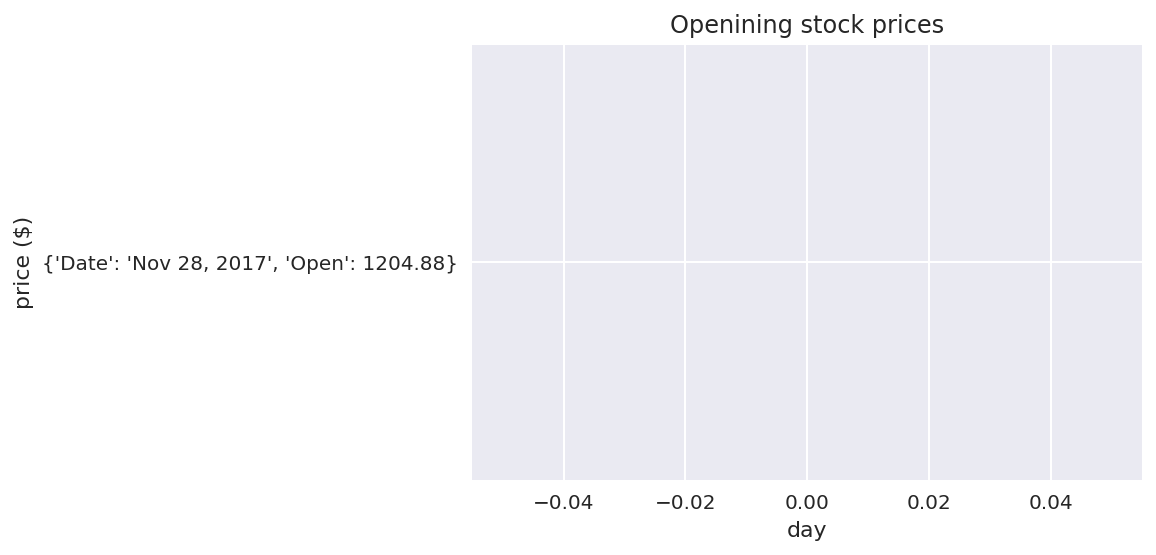

{'Date': 'Nov 27, 2017', 'Open': 1202.66}


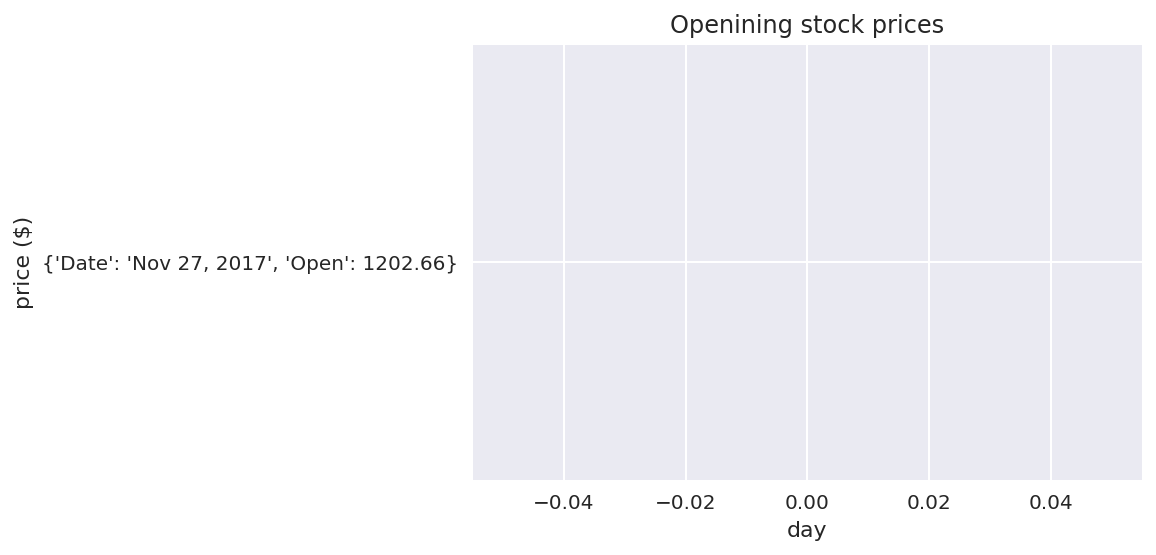

{'Date': 'Nov 24, 2017', 'Open': 1160.7}


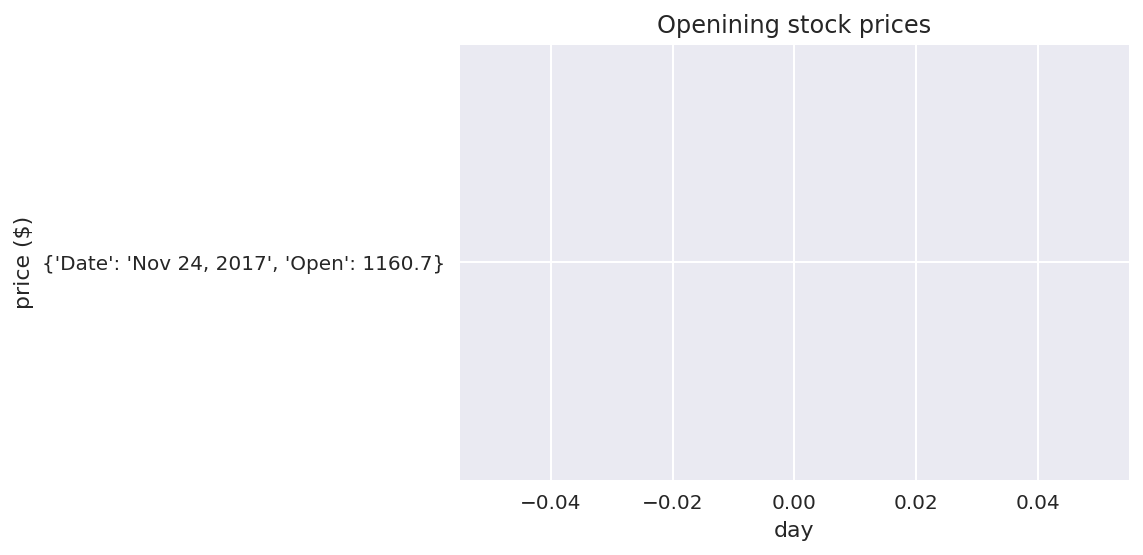

{'Date': 'Nov 22, 2017', 'Open': 1141.0}


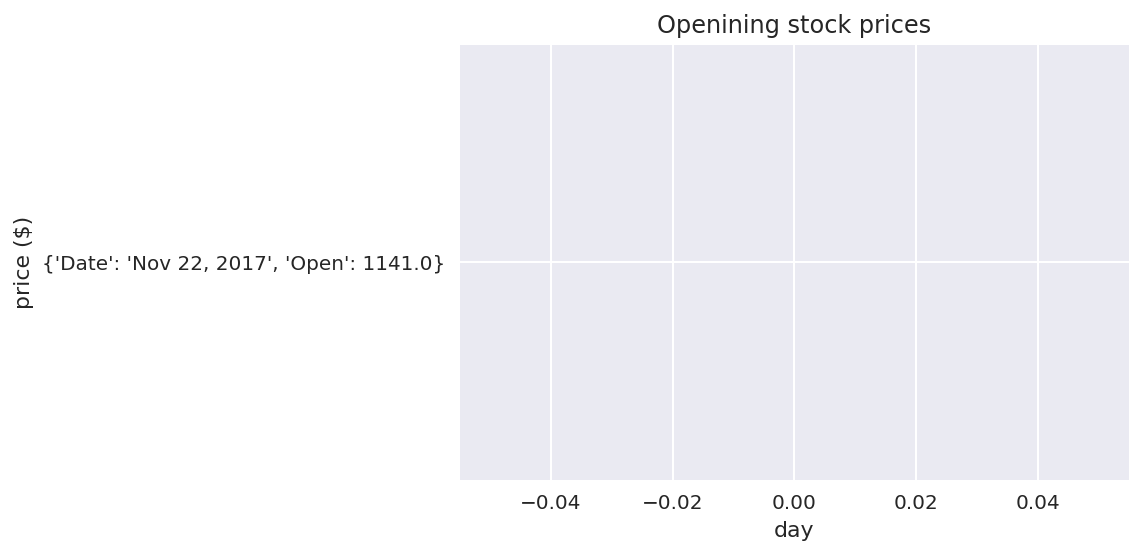

{'Date': 'Nov 21, 2017', 'Open': 1132.86}


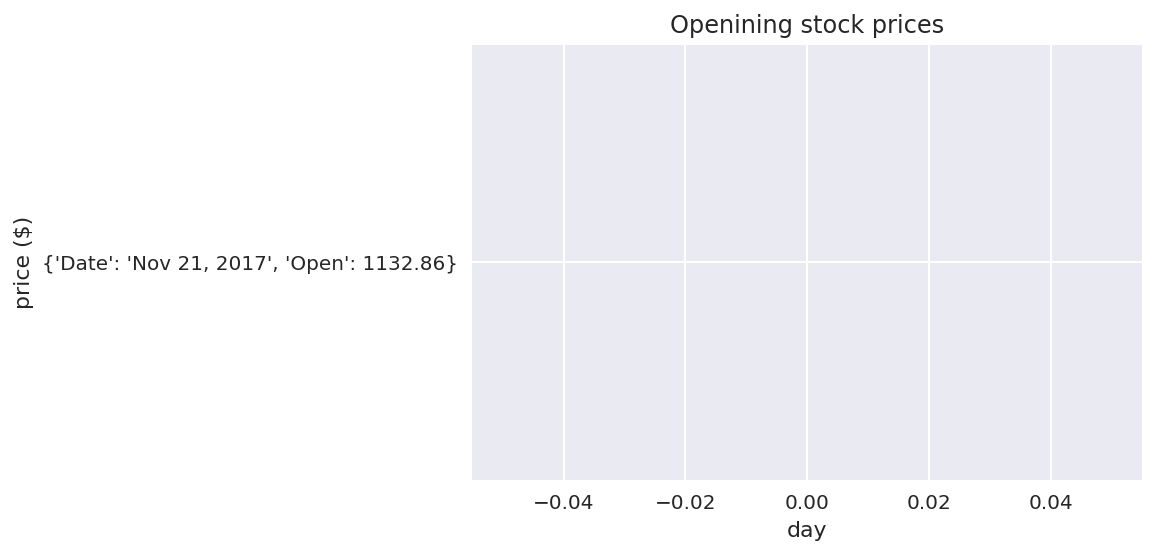

{'Date': 'Nov 20, 2017', 'Open': 1129.77}


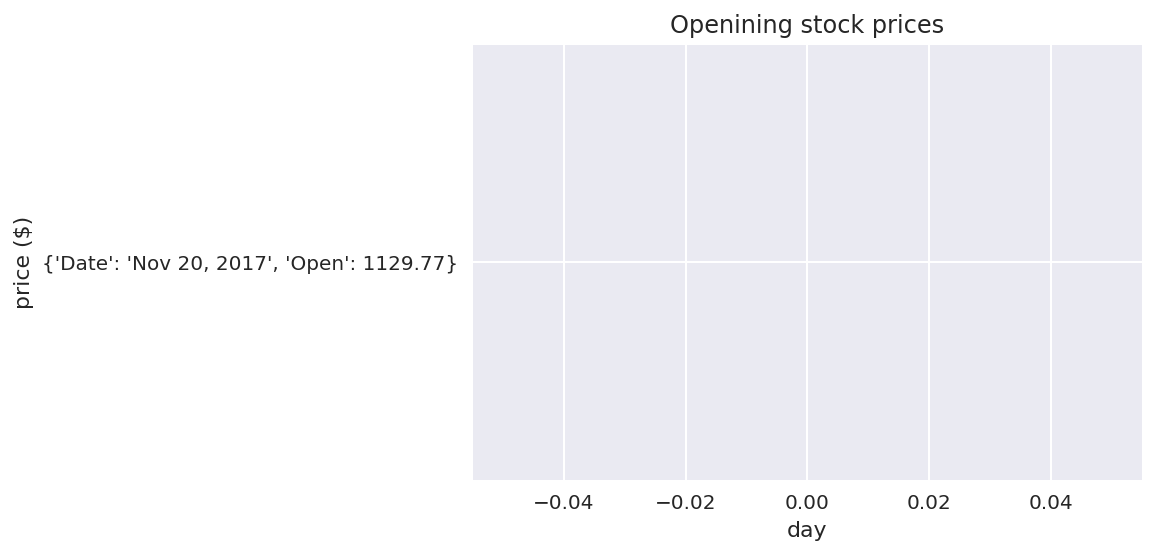

{'Date': 'Nov 17, 2017', 'Open': 1138.28}


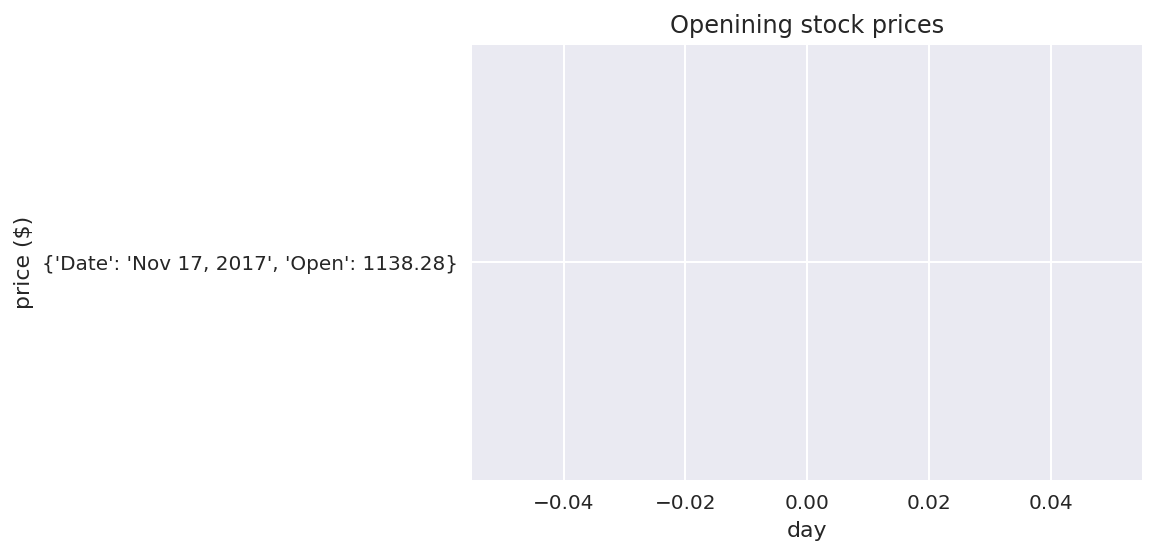

{'Date': 'Nov 16, 2017', 'Open': 1130.16}


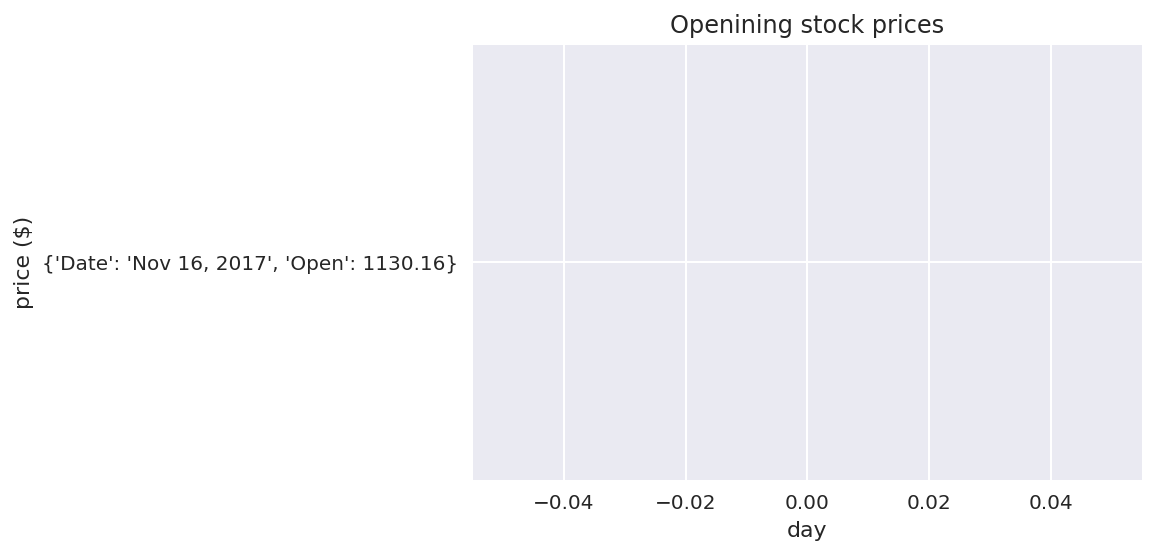

{'Date': 'Nov 15, 2017', 'Open': 1127.01}


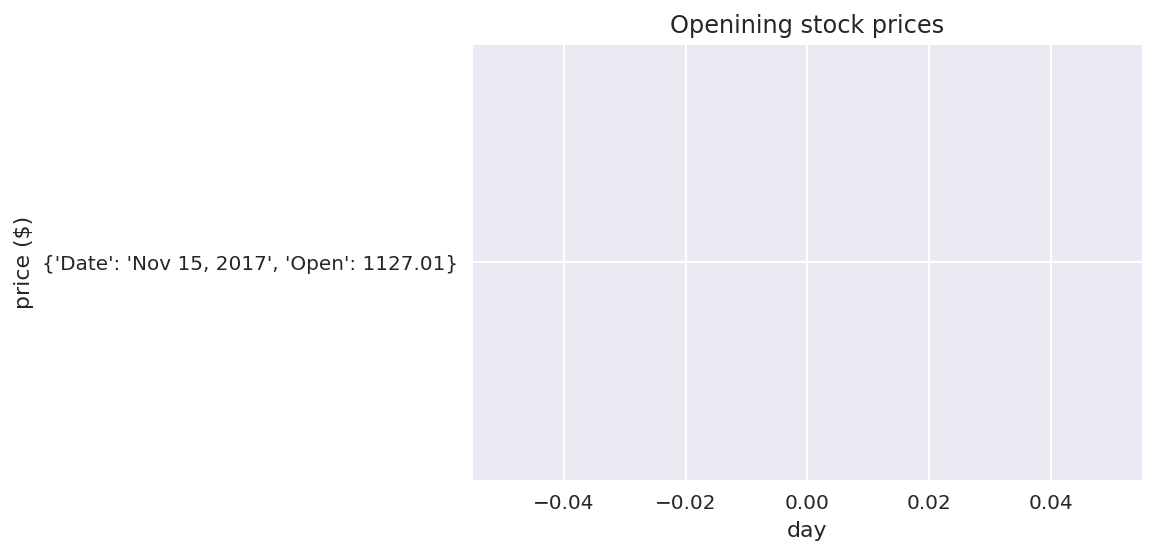

{'Date': 'Nov 14, 2017', 'Open': 1130.11}


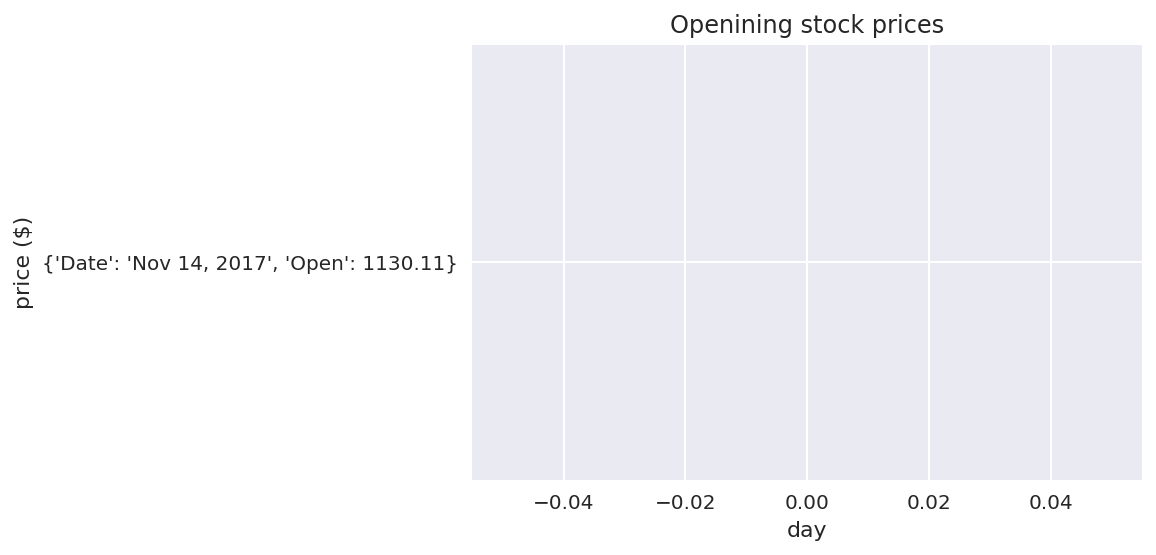

{'Date': 'Nov 13, 2017', 'Open': 1123.0}


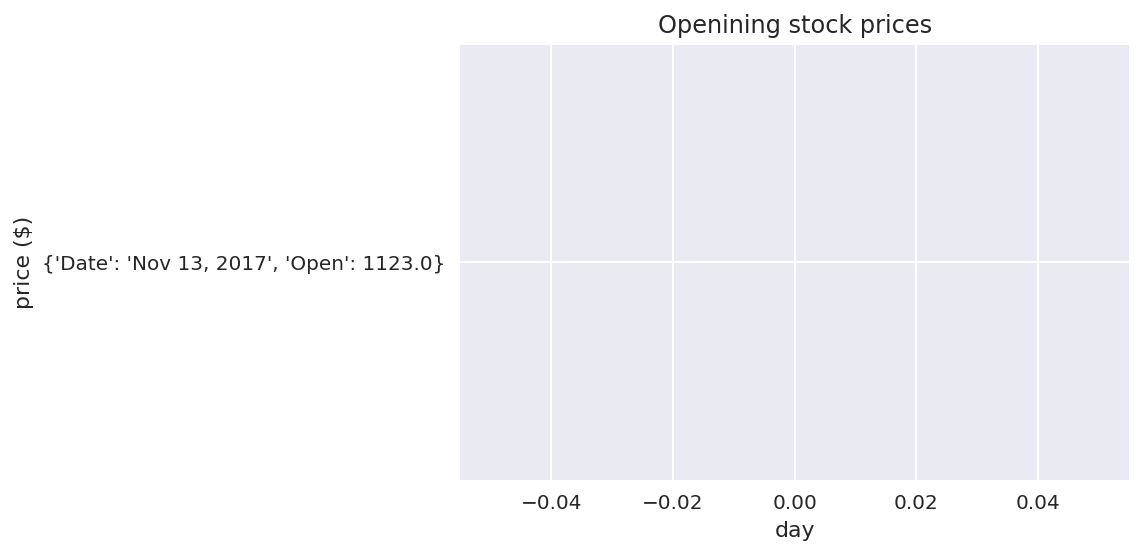

{'Date': 'Nov 10, 2017', 'Open': 1126.1}


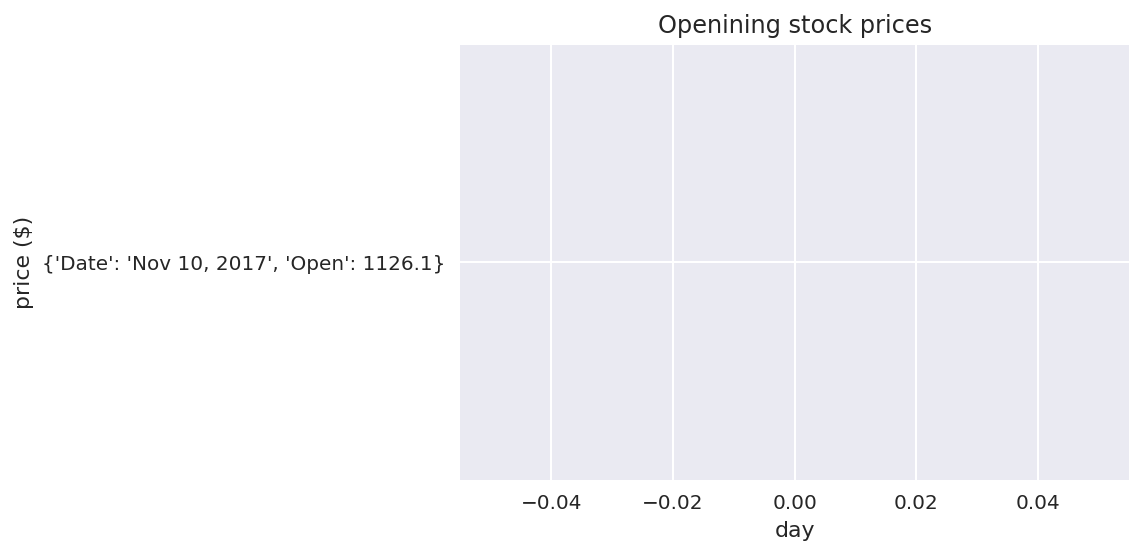

{'Date': 'Nov 09, 2017', 'Open': 1125.96}


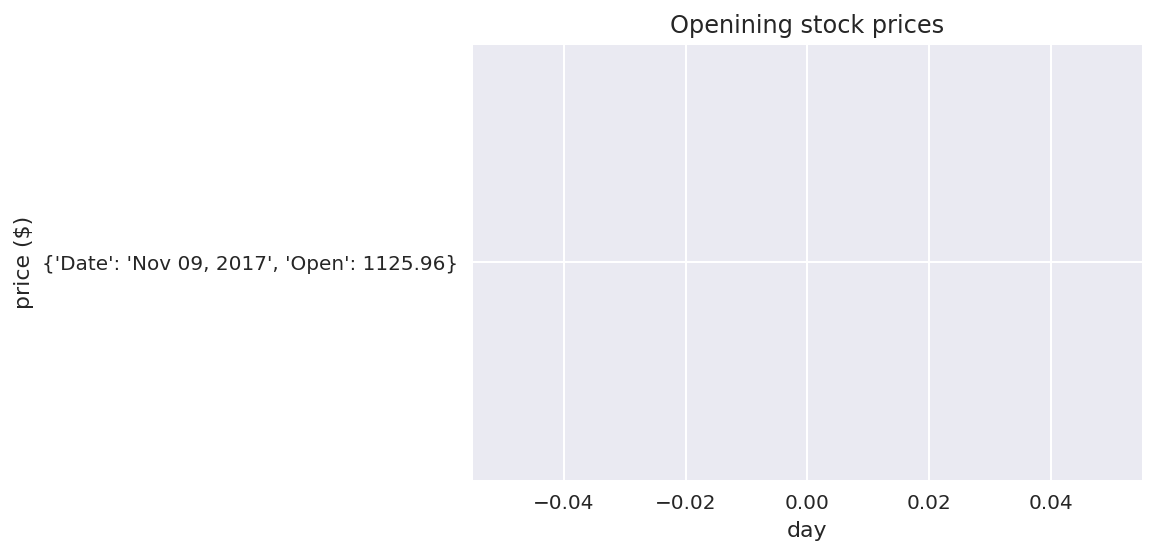

{'Date': 'Nov 08, 2017', 'Open': 1122.82}


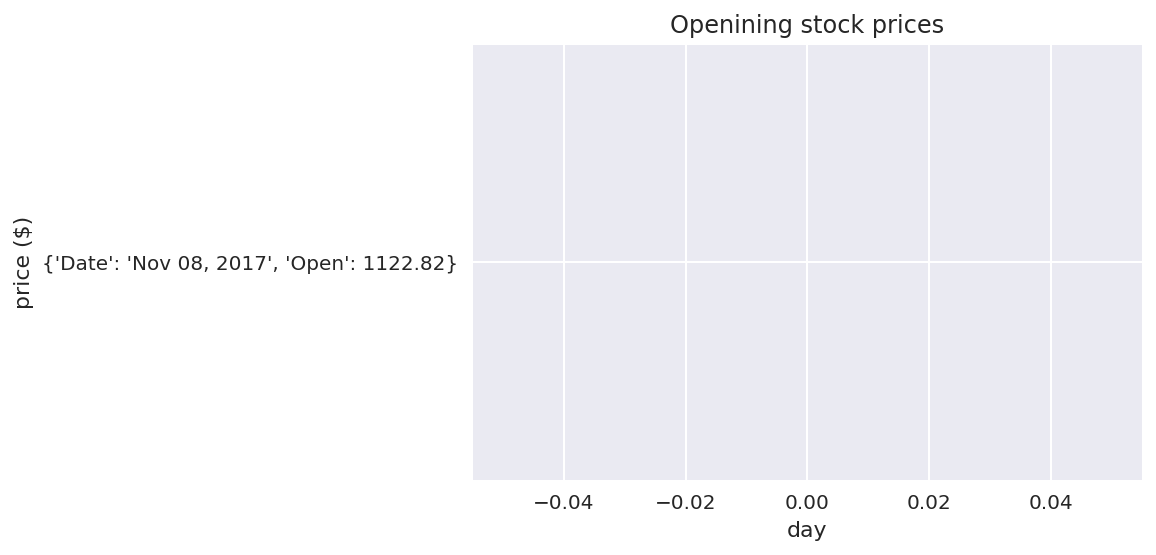

{'Date': 'Nov 07, 2017', 'Open': 1124.74}


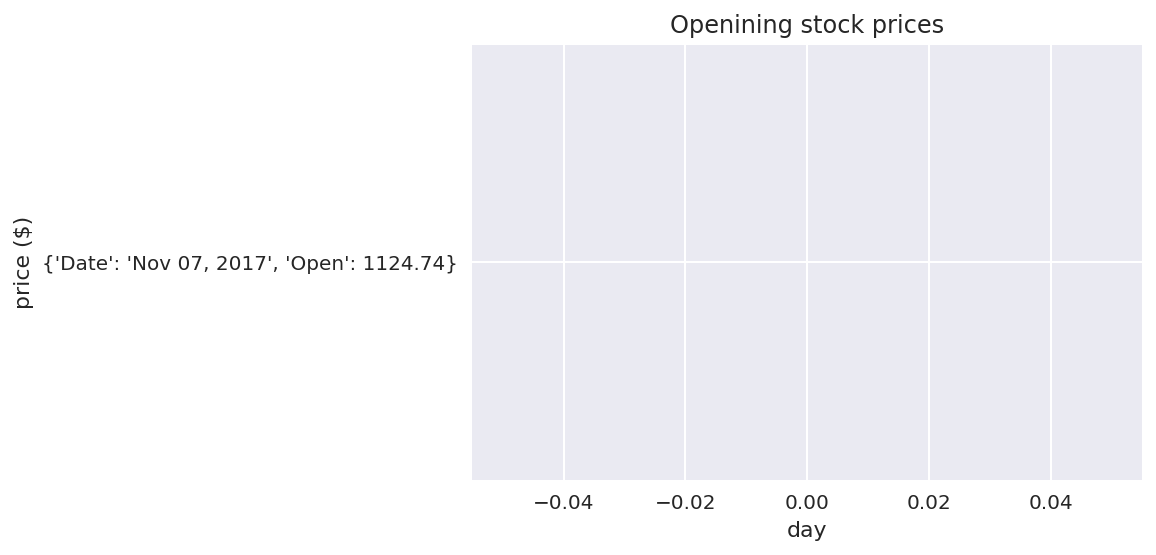

{'Date': 'Nov 06, 2017', 'Open': 1109.15}


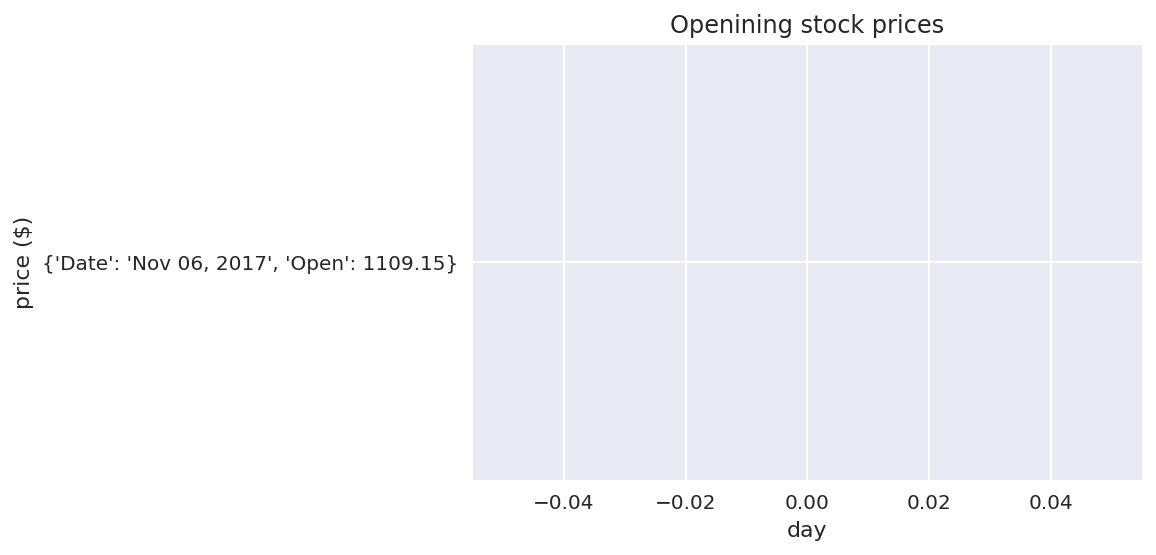

{'Date': 'Nov 03, 2017', 'Open': 1091.15}


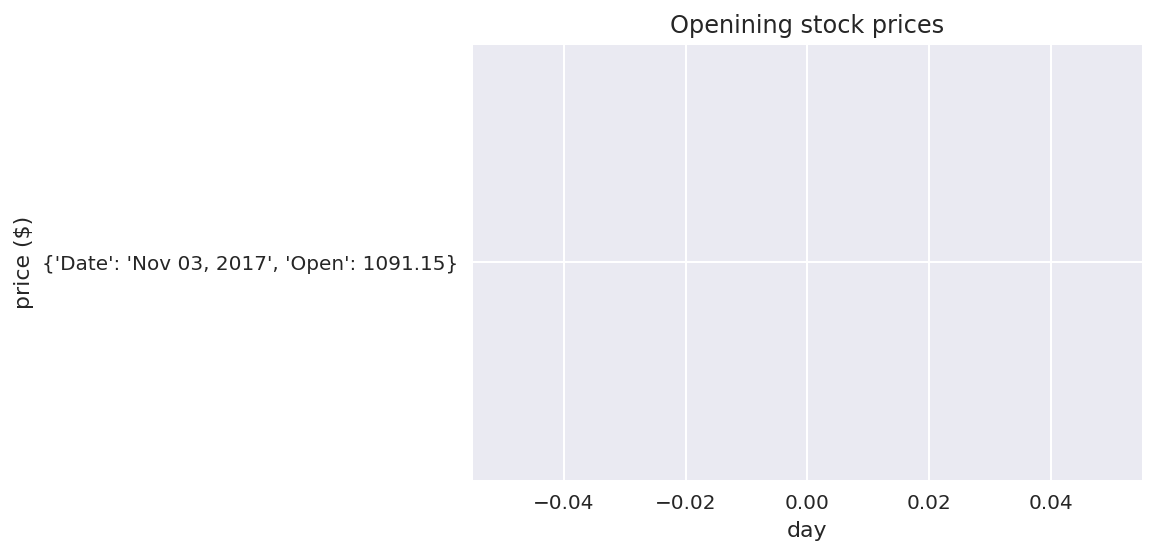

{'Date': 'Nov 02, 2017', 'Open': 1097.81}


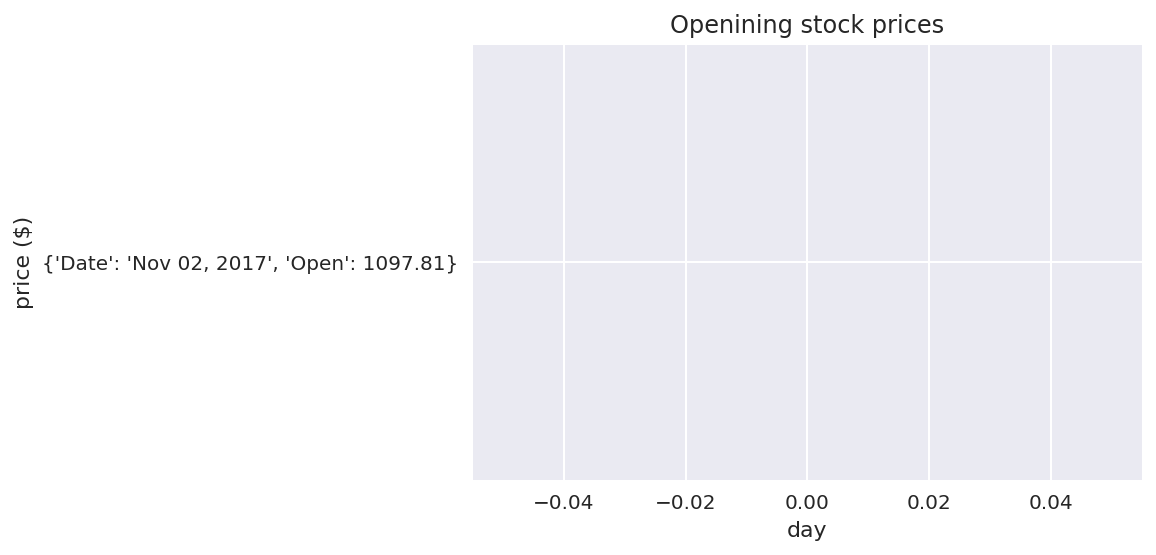

{'Date': 'Nov 01, 2017', 'Open': 1105.4}


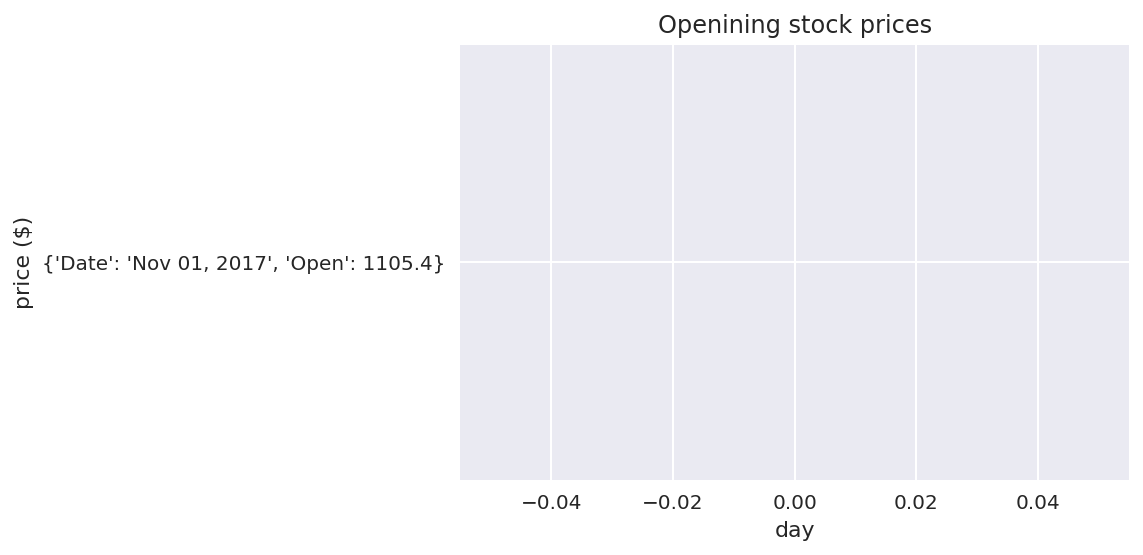

{'Date': 'Oct 31, 2017', 'Open': 1109.0}


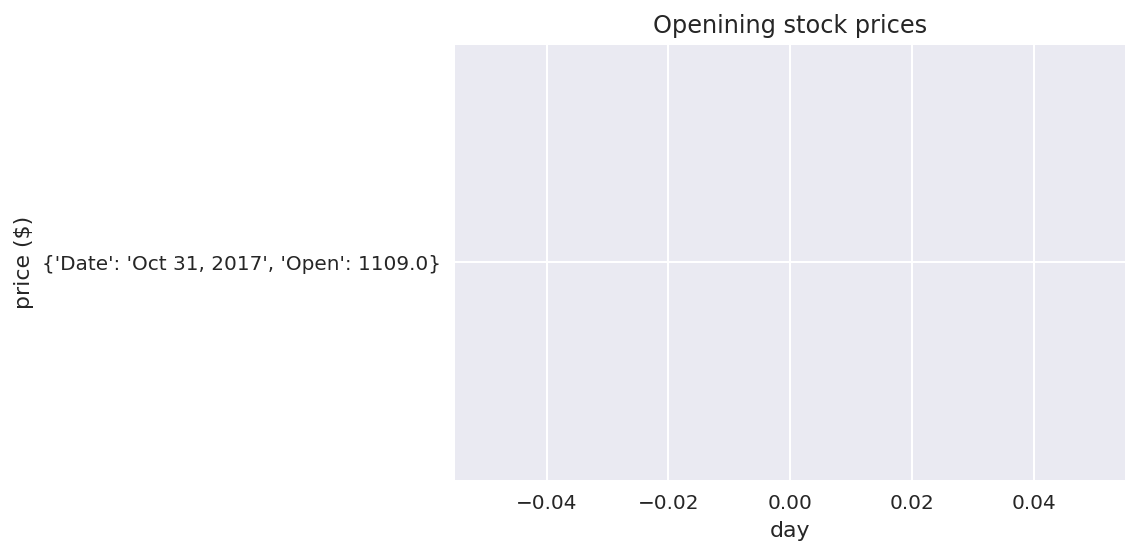

{'Date': 'Oct 30, 2017', 'Open': 1095.01}


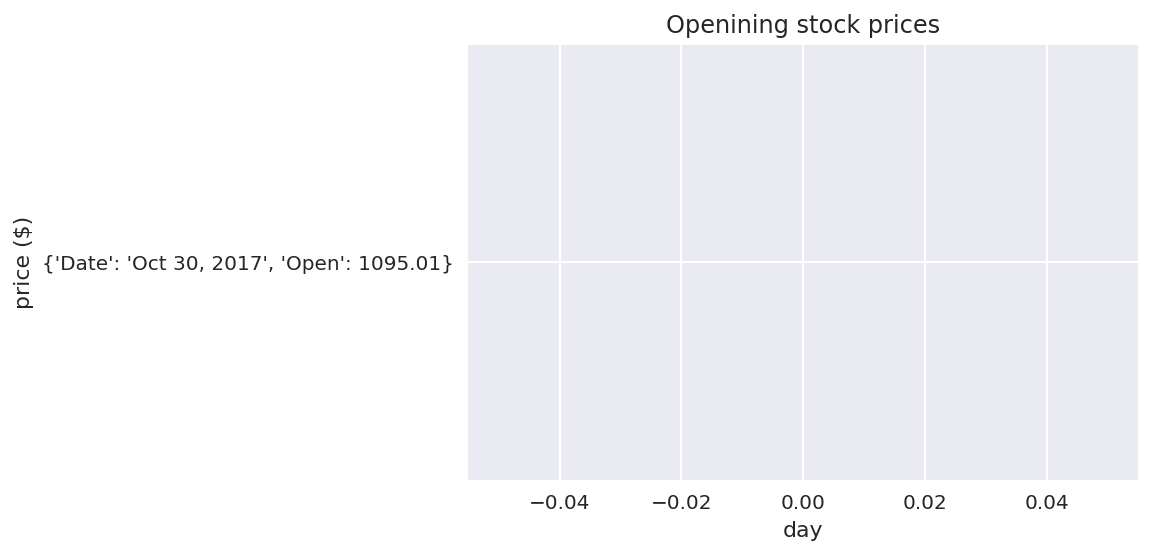

{'Date': 'Oct 27, 2017', 'Open': 1058.14}


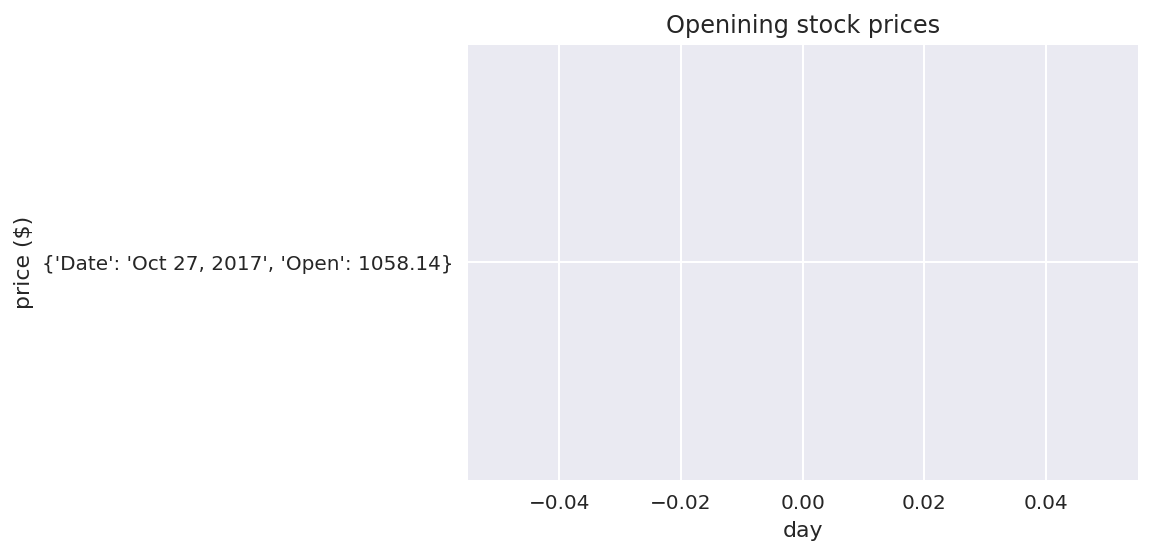

{'Date': 'Oct 26, 2017', 'Open': 980.33}


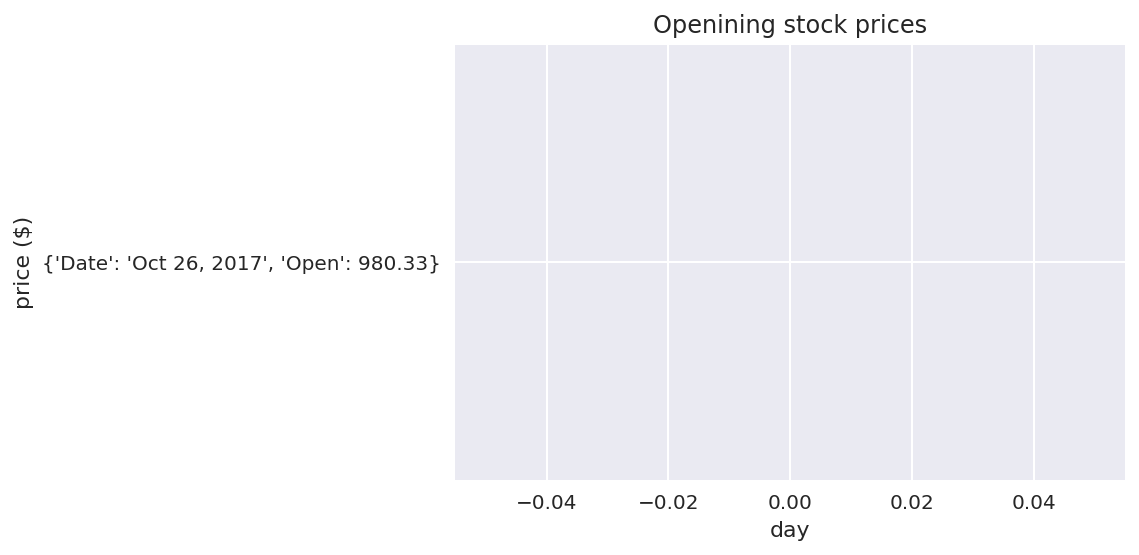

{'Date': 'Oct 25, 2017', 'Open': 978.0}


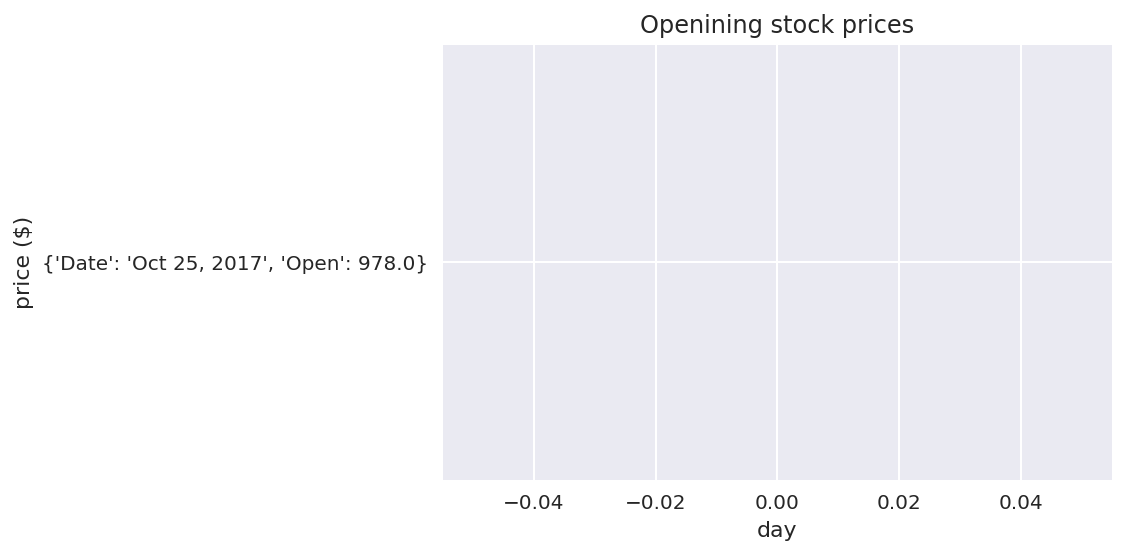

{'Date': 'Oct 24, 2017', 'Open': 969.0}


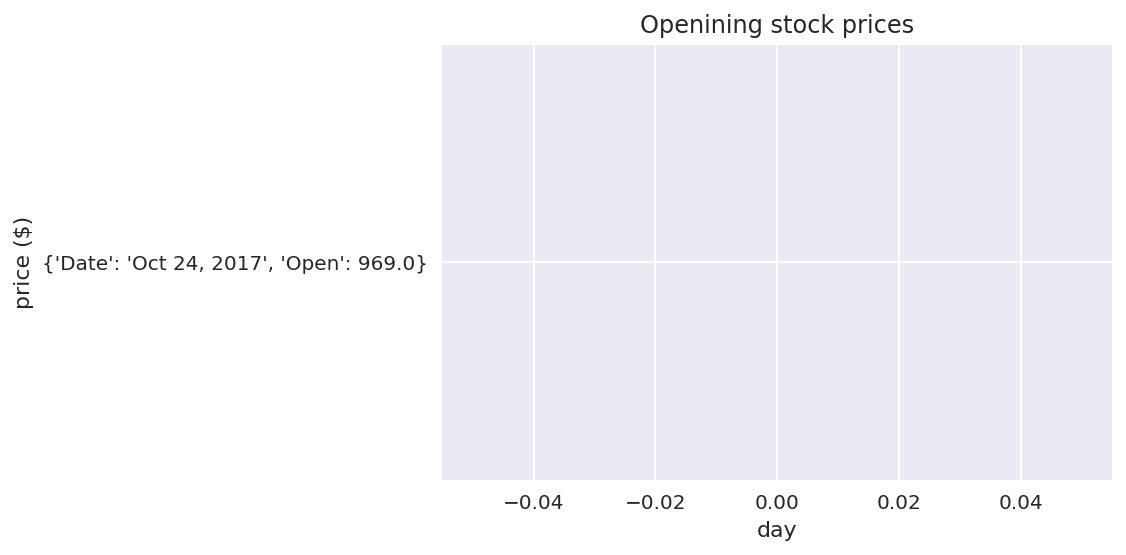

{'Date': 'Oct 23, 2017', 'Open': 986.73}


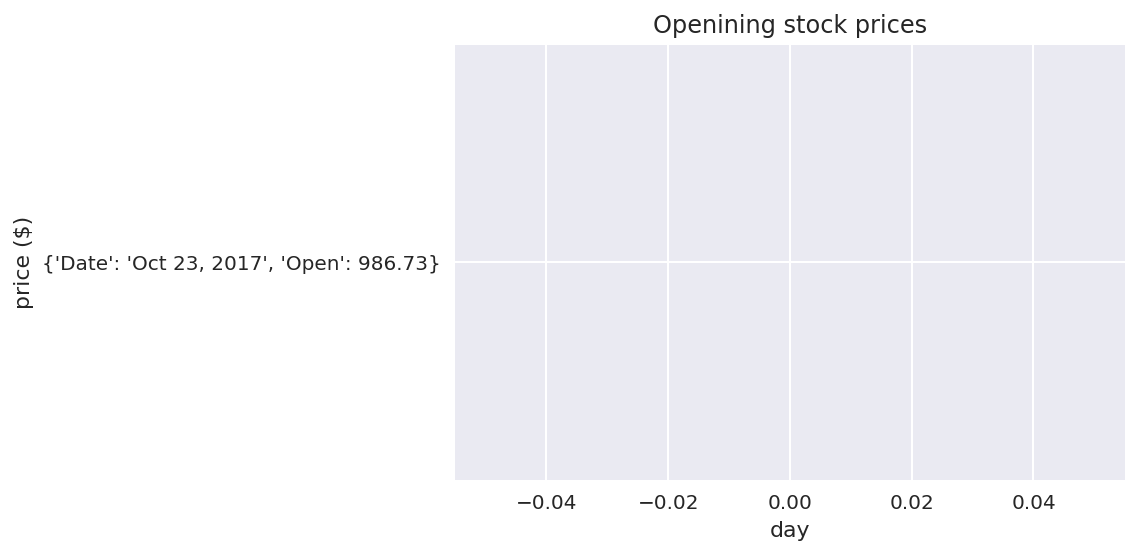

In [36]:
if __name__ == '__main__':
    for i in get_prices('amzn', 1000):
        print(i)
        plot_prices(i)